In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

**Importing and splitting the data into training and testing**

In [59]:

combined = pd.read_csv('/content/drive/MyDrive/Dataset.csv')

rows_to_drop = combined.loc[combined['Patient_ID'].apply(lambda x: len(str(x)) == 6)]
df_train = combined.drop(rows_to_drop.index)
df_train.to_csv('data_part1.csv', index=False)

rows_to_drop = combined.loc[combined['Patient_ID'].apply(lambda x: len(str(x)) != 6)]
df_test = combined.drop(rows_to_drop.index)
df_test.to_csv('data_part2.csv', index=False)

In [4]:
combined.shape

(1552210, 44)

In [5]:
df_train.shape

(790215, 44)

In [6]:
df_test.shape

(761995, 44)

In [7]:
# importing the test and training data

df_train = pd.read_csv('/content/data_part1.csv')
df_test = pd.read_csv('/content/data_part2.csv')

**Exploratory data analysis**

In [8]:
df_train.head(15)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072
5,5,5,62.0,100.0,NaN,124.0,85.0,61.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,6,0,17072
6,6,6,61.0,100.0,NaN,101.0,75.0,58.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,7,0,17072
7,7,7,68.0,100.0,35.78,142.0,93.5,78.0,16.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,8,0,17072
8,8,8,71.0,100.0,NaN,121.0,74.0,91.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,9,0,17072
9,9,9,69.0,100.0,NaN,120.0,79.0,98.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,10,0,17072


**As can be seen, this is a time series data. The dataframe has 44 columns. After the first loook at data, it can be observed that the data seems quite sparse.**

In [9]:
# let's list down all the different columns

df_train.columns

Index(['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [10]:
# list of all the unique patients
# total number of patients present in the dataset

patients = list(df_test['Patient_ID'].unique())
len(patients)

20000

In [11]:
# Function to draw correlation heat map

def corr_matrix(df):
  corr = df.corr()
  mask = np.triu(np.ones_like(corr, dtype=bool))
  f, ax = plt.subplots(figsize=(40,40))
  cmap = sns.diverging_palette(220, 10, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap="Paired", vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
# Percentage of null values present in all the parameters

null_values = df_train.isnull().mean()*100
null_values = null_values.sort_values(ascending=False)
null_values

,0
EtCO2,100.000000
TroponinI,99.877881
Bilirubin_direct,99.850420
Fibrinogen,99.236917
Bilirubin_total,98.773372
Alkalinephos,98.540650
AST,98.504205
Lactate,96.565112
PTT,95.152459
SaO2,95.044387


**After thorough analysis of the data, it was found that a lot of the features were redundant, i.e. a lot of the features were indicative of the same parameter, so those features were removed on the basis of their sparsity. Another criteria taken into consideration was ease of getting the parameter among different hospitals, becuase some of the parameters are easier to obtain for a given hospital while some are expensive and for some a hospital does not even have infrastructure to get those features.**

In [13]:
# the features have been removed based on the number of null values and redundancy

# 'Unnamed: 0'-- this is the index column
# 'SBP' -- MAP is considered instead of SBP and DBP
# 'DBP' -- MAP is considered instead of SBP and DBP
# 'EtCO2' -- It is not readily. available and also not available in the dataset
# 'BaseExcess' -- It is an indicator of the health of kidney and pancreas but is redundant here becuase a lot of different features for kidney are being considered here.
# 'HCO3' -- It is also an indicator of the health of kidney and pancreas but is redundant here becuase a lot of different features for kidney are being considered here.
# 'pH' -- It is also an indicator of the health of kidney and pancreas but is redundant here becuase a lot of different features for kidney are being considered here.
# 'PaCO2' -- It is an indicator of respiratory health of an individual, we are considering SaO2 and FiO2 which are more readily avaiilable
# 'Alkalinephos' -- It is an indicator of the health of the liver of an individual, but we are considering Bilirubin instead of this, as data of this is more scarce.
# 'Calcium' -- It is also an indicator of the health of kidney but is redundant here becuase a lot of different features for kidney are being considered here.
# 'Magnesium' -- It is an indicator of metabolism and kidney health, but we are considering Lactate instead as it is more readily available
# 'Phosphate' -- It is also an indicator of the health of kidney but is redundant here becuase a lot of different features for kidney are being considered here.
# 'Potassium' -- It is also an indicator of the health of kidney but is redundant here becuase a lot of different features for kidney are being considered here.
# 'PTT' -- It is used to check inflammation. We are using WBC counts instead as it is easy to obtain.
# 'Fibrinogen' -- It is used to check blood clotting ability. We are using Platelets instead, as it is easier to obtain.
# 'Unit1' -- Both the columns Unit1 and Unit2 have been merged to form a single column.
# 'Unit2' -- Both the columns Unit1 and Unit2 have been merged to form a single column.

columns_drop={'Unnamed: 0','SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium',
'Phosphate','Potassium','PTT','Fibrinogen','Unit1','Unit2'}
df_train = df_train.assign(Unit=df_train['Unit1'] + df_train['Unit2'])
df_train_mod = df_train.drop(columns=columns_drop)
df_train_mod.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'FiO2', 'SaO2', 'AST',
       'BUN', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose',
       'Lactate', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Platelets', 'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel',
       'Patient_ID', 'Unit'],
      dtype='object')

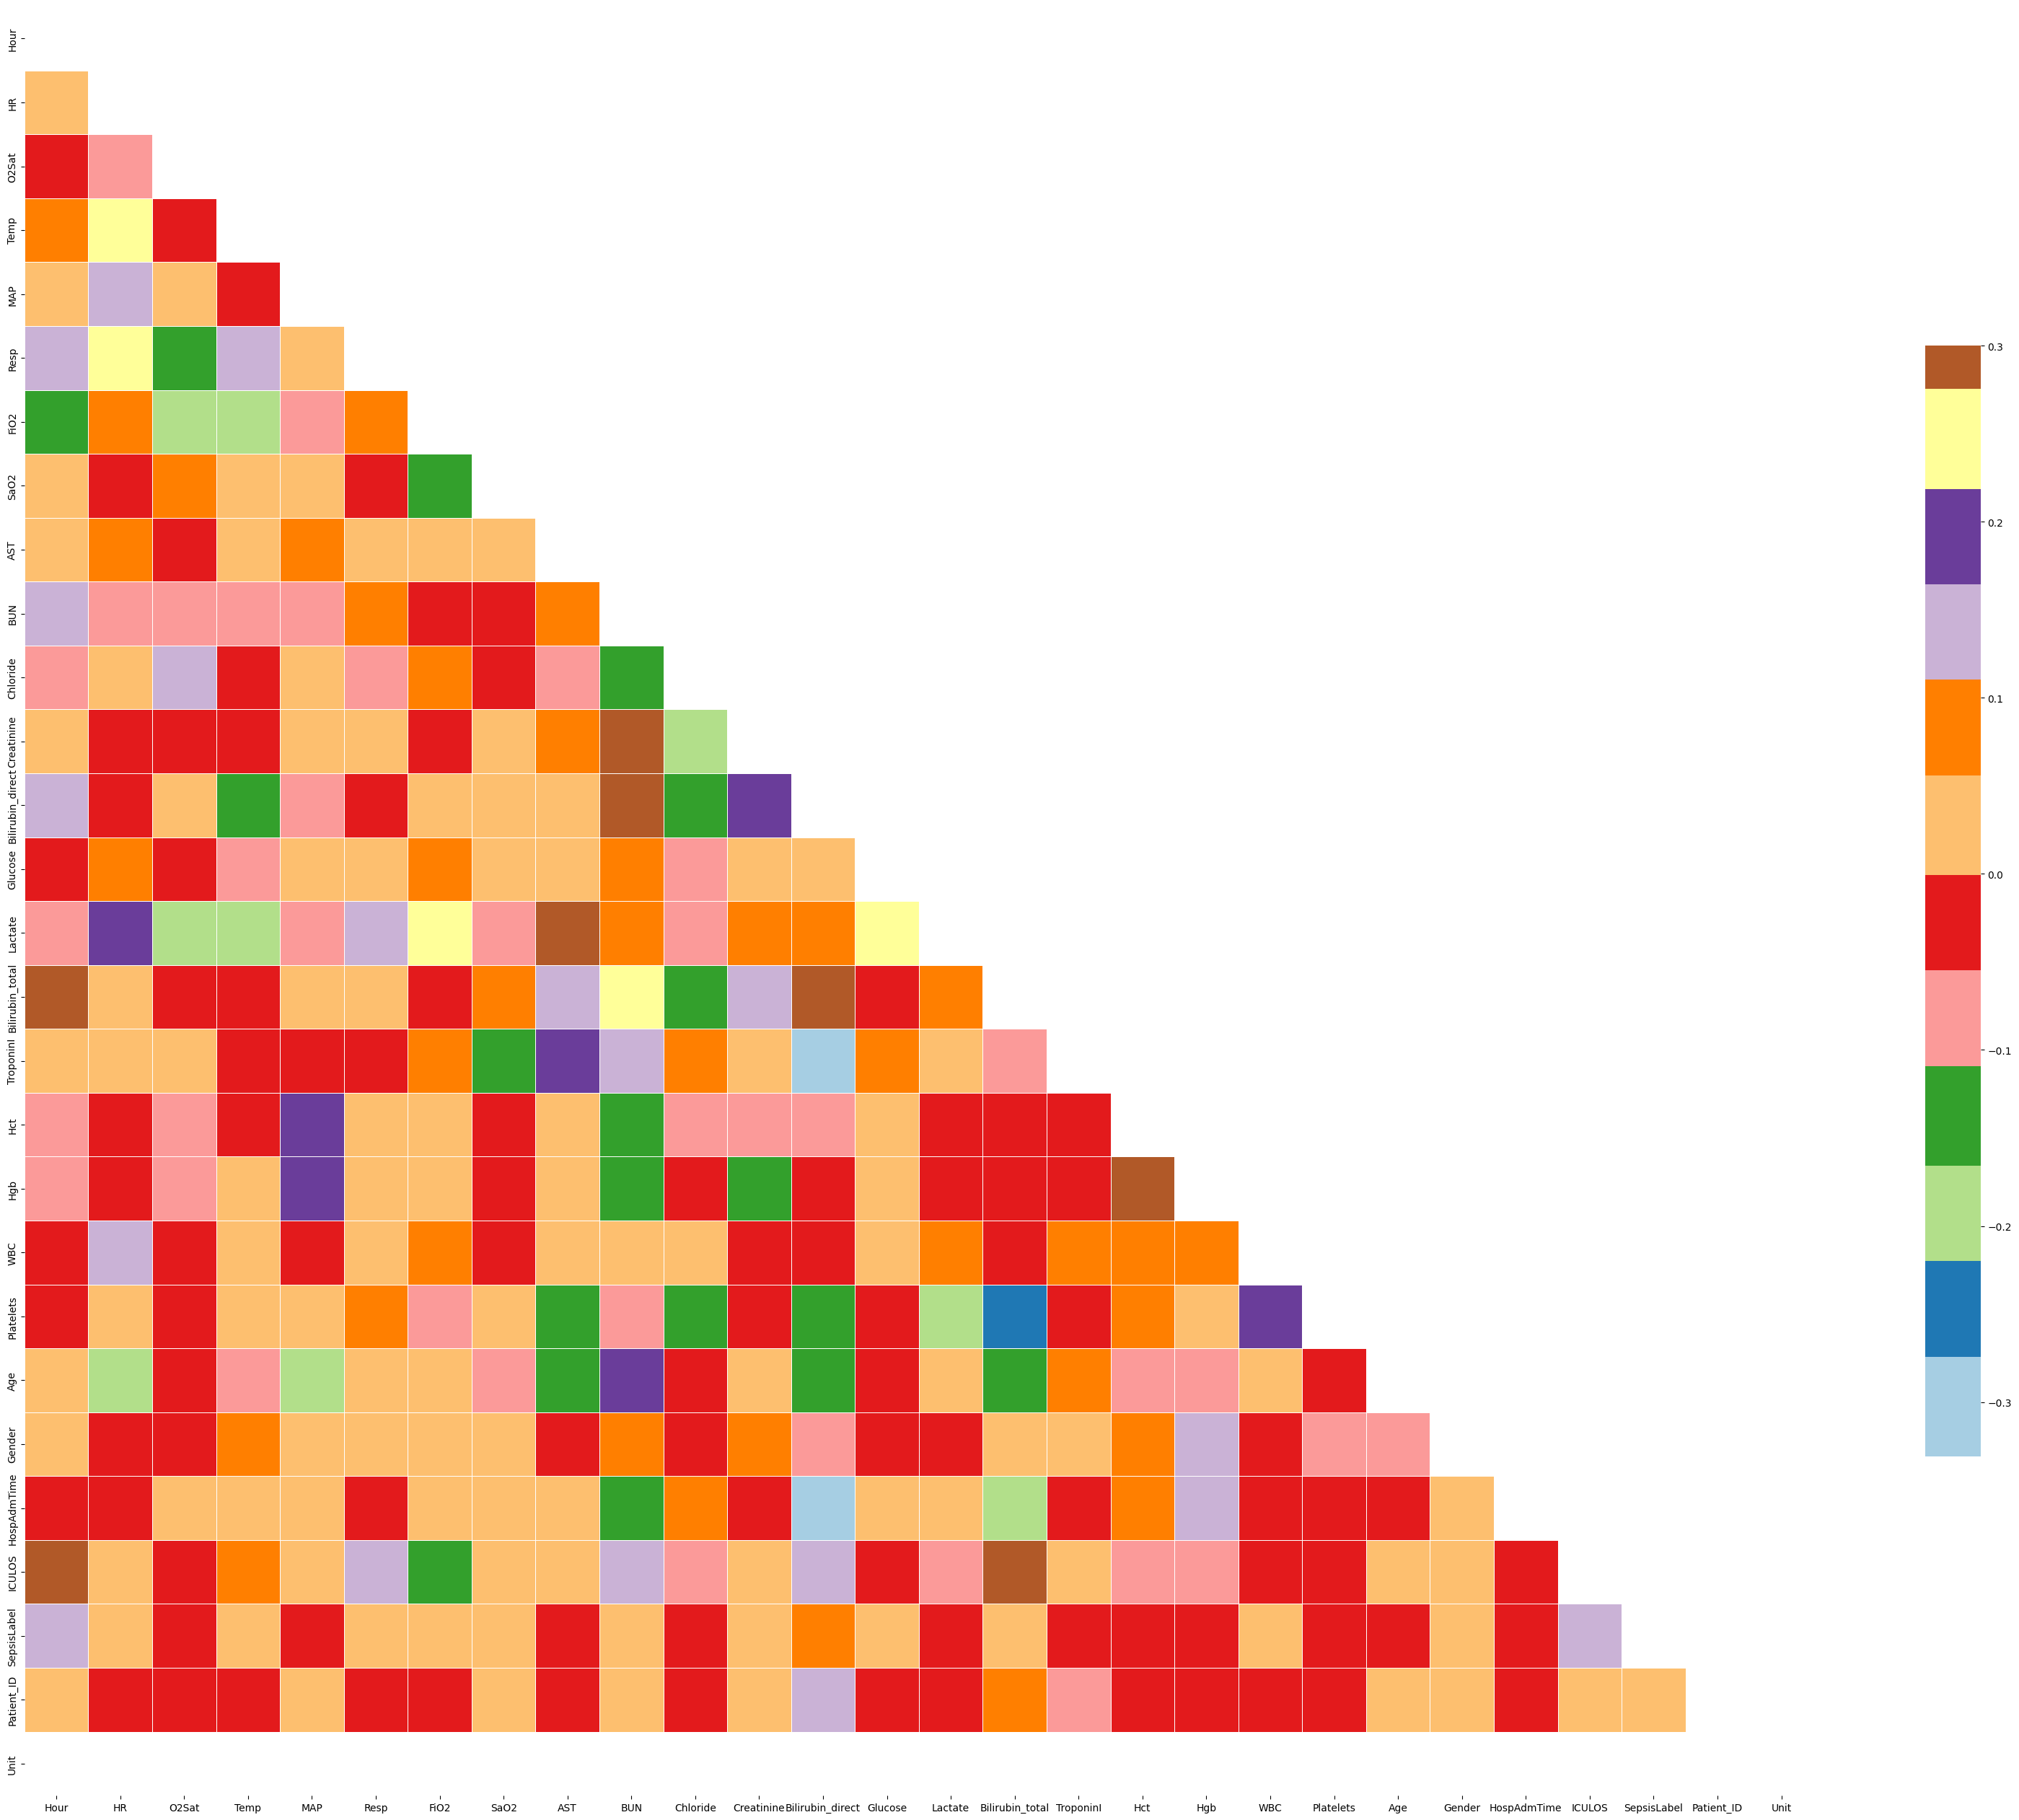

In [15]:
# correlation matrix to check if there is high correlation between the remaining features

corr_matrix(df_train_mod)

**As can be seen in this correlation heat map almost all of the feature do not have high correlation.**

**Imputation**

**Since there are a lot of missing values in the dataset, therefore imputation was done to fill the missing values. While imputing, it is important to note that imputation should be done on per patient basis, otherwise the data from one patient will leak into the data of the other patient. Also another point that should be taken into consideration is that mean, median, mode can not directly be used to impute as it will result in uneven distribution of the parameters with respect to time.**

In [16]:
df_train_impute = df_train_mod.copy()
columns_impute = list(df_train_impute.columns)

In [17]:
# bfill and ffill for imputing

grouped_by_patient = df_train_impute.groupby('Patient_ID')
df_train_impute = grouped_by_patient.apply(lambda x: x.bfill().ffill())

<ipython-input-17-630336680b91>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_train_impute = grouped_by_patient.apply(lambda x: x.bfill().ffill())


In [18]:
df_train_impute.head()

Hour     HR  O2Sat   Temp    MAP  Resp  FiO2  SaO2   AST  \
Patient_ID                                                                    
1          132940     0   97.0   95.0  36.11  75.33  19.0  0.28  88.0  16.0   
           132941     1   97.0   95.0  36.11  75.33  19.0  0.28  88.0  16.0   
           132942     2   89.0   99.0  36.11  86.00  22.0  0.28  88.0  16.0   
           132943     3   90.0   95.0  36.11  91.33  30.0  0.28  88.0  16.0   
           132944     4  103.0   88.5  36.11  91.33  24.5  0.28  88.0  16.0   

                    BUN  ...   Hgb  WBC  Platelets    Age  Gender  \
Patient_ID               ...                                        
1          132940  14.0  ...  12.5  5.7      317.0  83.14       0   
           132941  14.0  ...  12.5  5.7      317.0  83.14       0   
           132942  14.0  ...  12.5  5.7      317.0  83.14       0   
           132943  14.0  ...  12.5  5.7      317.0  83.14       0   
           132944  14.0  ...  12.5  5.7      317.0  83.14       0   

                   HospAdmTime  ICULOS  SepsisLabel  Patient_ID  Unit  
Patient_ID                                                             
1          132940        -0.03       1            0           1   NaN  
           132941        -0.03       2            0           1   NaN  
           132942        -0.03       3            0           1   NaN  
           132943        -0.03       4            0           1   NaN  
           132944        -0.03       5            0           1   NaN  

[5 rows x 28 columns]

In [19]:
# Now let's check the remaining proportion of missing values

null_values = df_train_impute.isnull().mean()*100
null_values = null_values.sort_values(ascending=False)
null_values

,0
TroponinI,97.357934
Bilirubin_direct,96.256841
Bilirubin_total,66.949754
AST,66.435590
SaO2,57.282891
Lactate,55.997418
Unit,48.868346
FiO2,36.195592
WBC,1.511994
Platelets,1.394810


**'TroponinI', 'Bilirubin_direct', 'AST', 'Bilirubin_total', 'Lactate', 'SaO2', 'FiO2', 'Unit', 'Patient_ID' have more than 25 percent of null values and hence are dropped from the dataset.**

In [20]:
# dropping all the columns with null values more than 25% and patient_id

null_col = ['TroponinI', 'Bilirubin_direct', 'AST', 'Bilirubin_total', 'Lactate', 'SaO2', 'FiO2',
            'Unit', 'Patient_ID']
df_train_impute = df_train_impute.drop(columns=null_col)
df_train_impute.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets', 'Age',
       'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [21]:
# onehot encoding the gender

one_hot = pd.get_dummies(df_train_impute['Gender'])
df_train_impute = df_train_impute.join(one_hot)
df_train_impute = df_train_impute.drop('Gender', axis=1)

**Gaussian Transformation and Standard Normalization**

**Generally models tend to give a better result for a normal ditribution. So in the below cells we explored different techniques to plot histograms and QQ plots of all the features and then we applied different transformations on it to see which were giving good results. The ones giving the beest results were then adopted in the dataframe.**

In [22]:
# function to draw histogram and QQ plot

def diagnostic_plots(df, variable):
    fig = plt.figure(figsize=(15,4))
    ax = fig.add_subplot(121)
    df[variable].hist(bins=30)
    ax = fig.add_subplot(122)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.xlabel(variable)
    plt.show()

In [26]:
# function to apply different transformations to make the plot gaussian

def try_gaussian(df, col):
  print('actual plot')
  diagnostic_plots(df,col)
  # this applies exponential transformation
  df['col_1.5'] = df[col]**(1/1.5)
  print('**1/1.5 plot')
  diagnostic_plots(df, 'col_1.5')
  df['col_.5'] = df[col]**(.5)
  print('**.5 plot')
  # this applies inverse transformation
  diagnostic_plots(df, 'col_.5')
  df['col_rec'] = 1 / (df[col]+0.00001)
  diagnostic_plots(df, 'col_rec')
  # this applies logarithmic trasnformation
  df['col_log'] = np.log(df[col]+1)
  diagnostic_plots(df, 'col_log')

O2Sat
actual plot


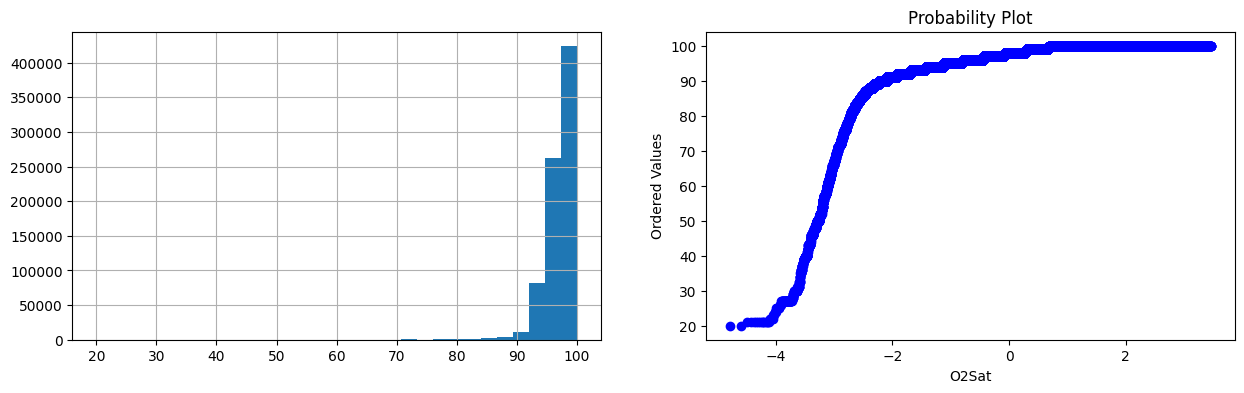

**1/1.5 plot


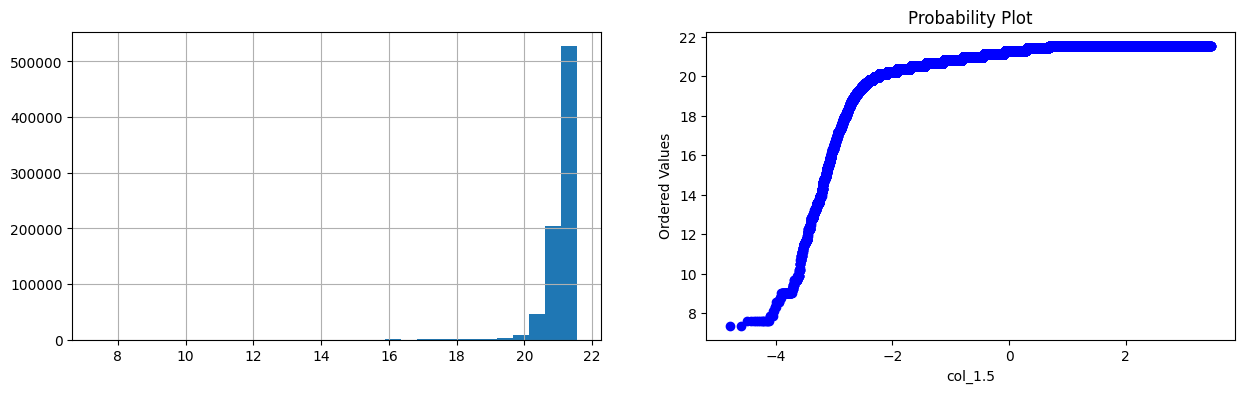

**.5 plot


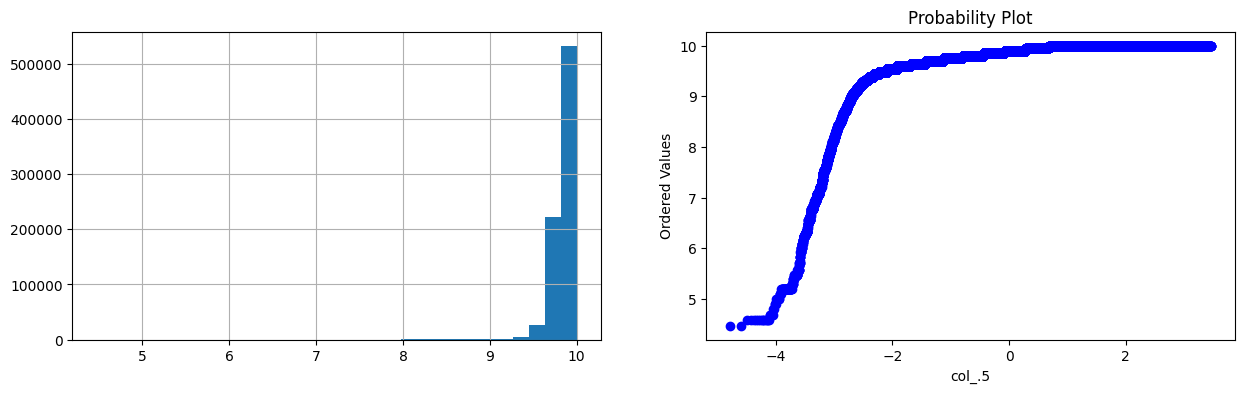

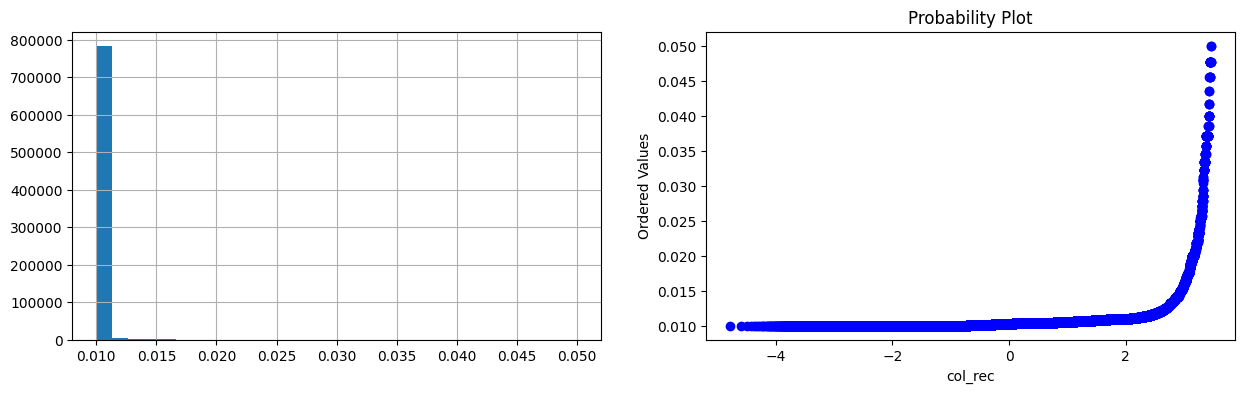

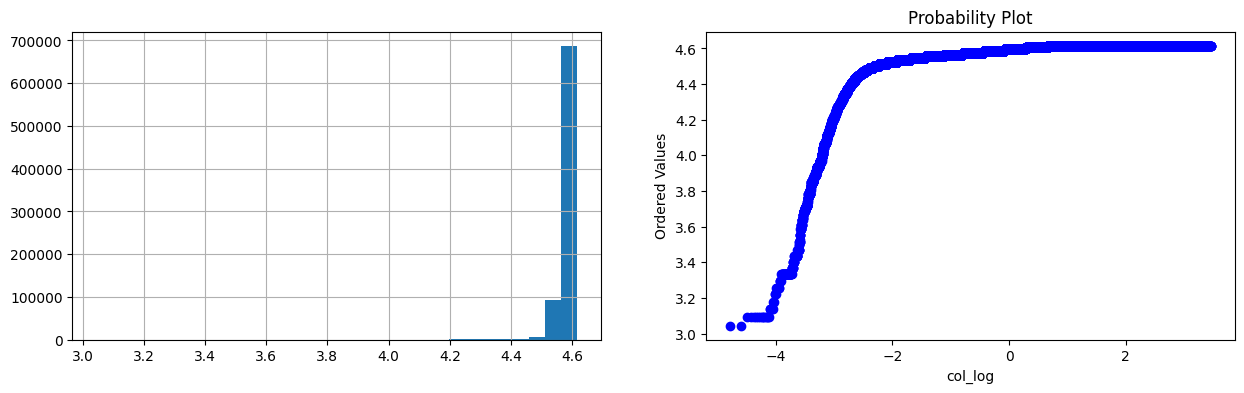

Temp
actual plot


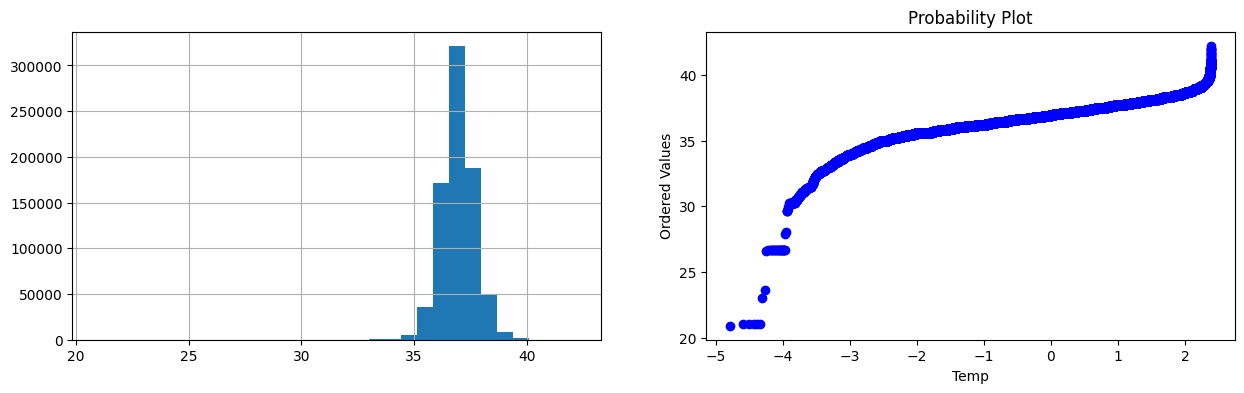

**1/1.5 plot


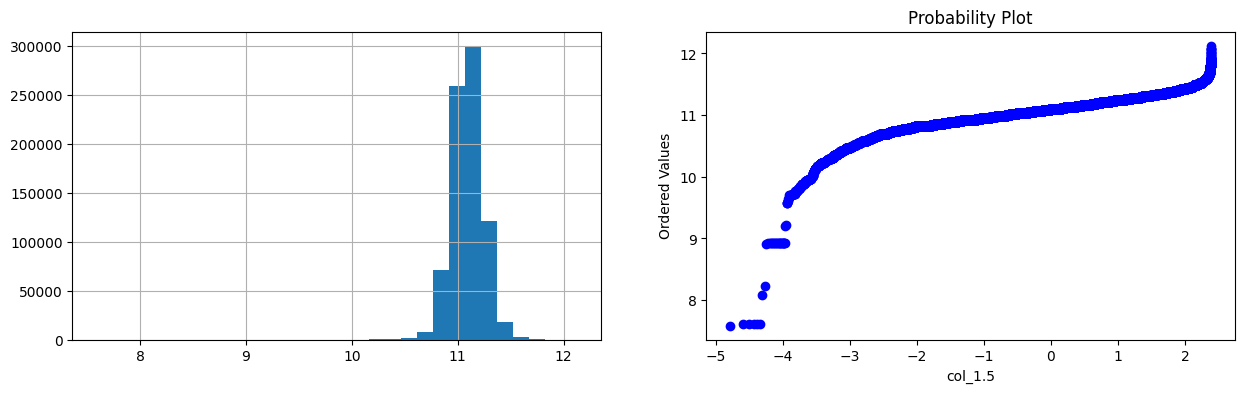

**.5 plot


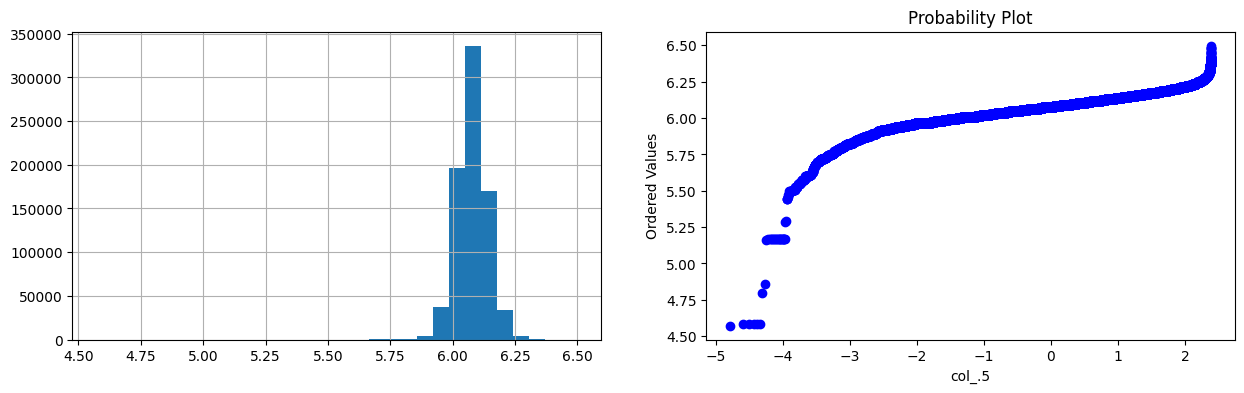

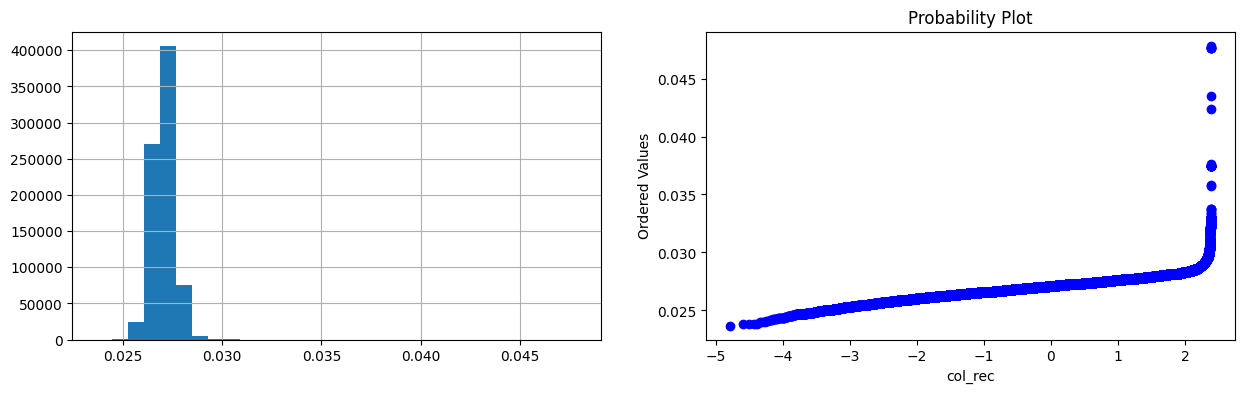

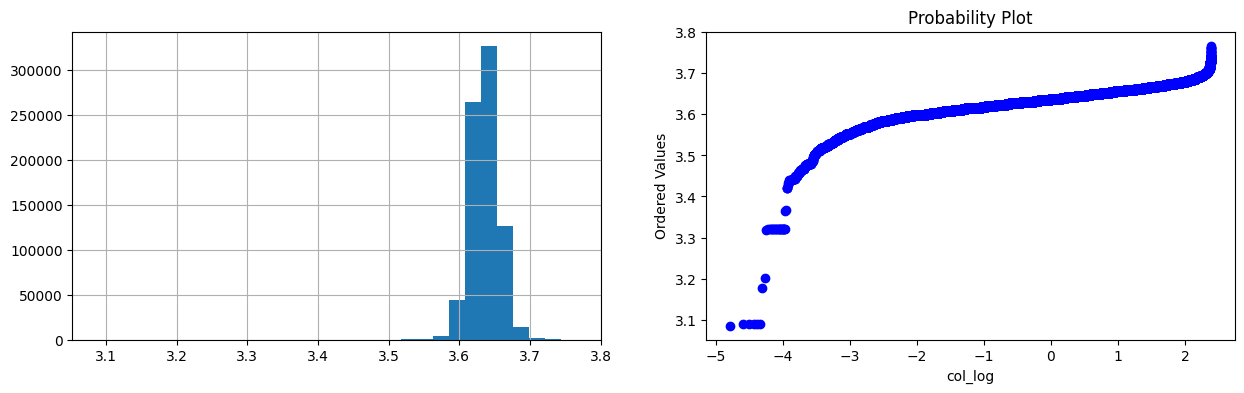

MAP
actual plot


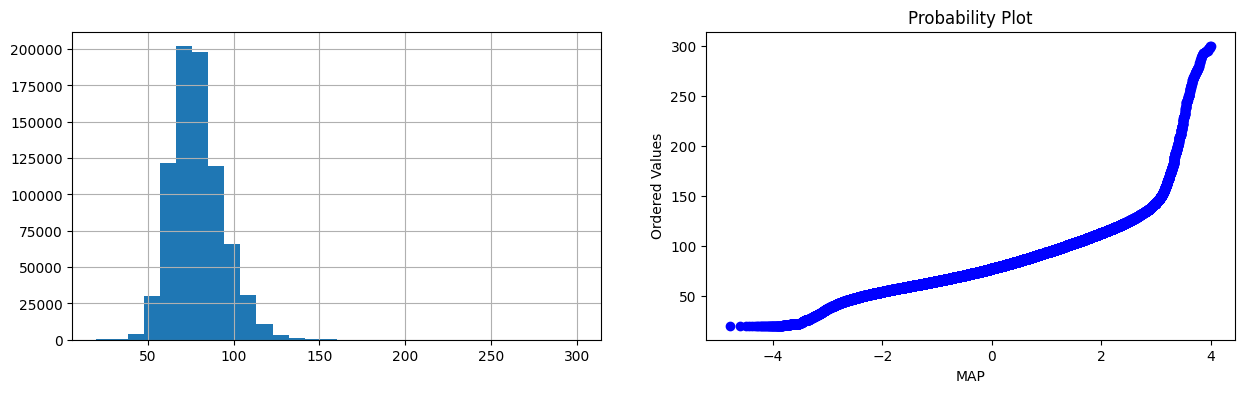

**1/1.5 plot


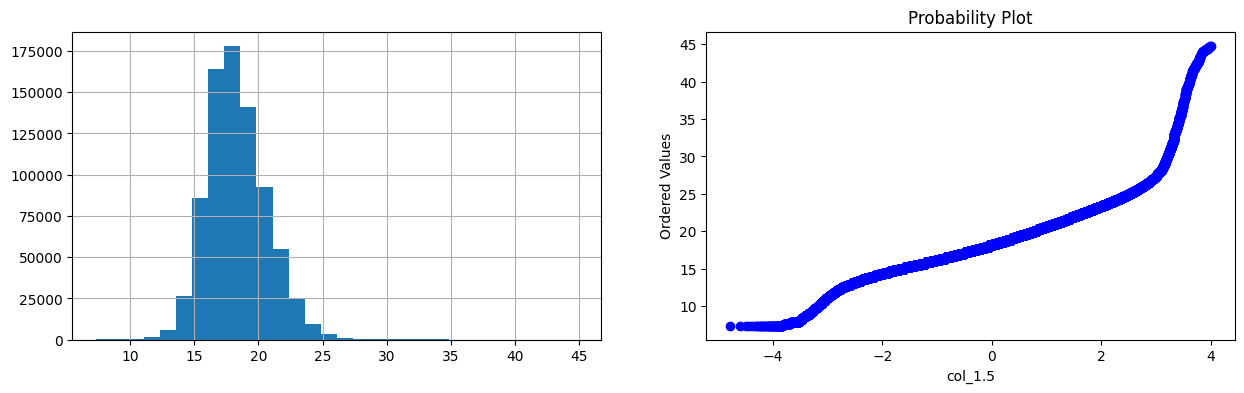

**.5 plot


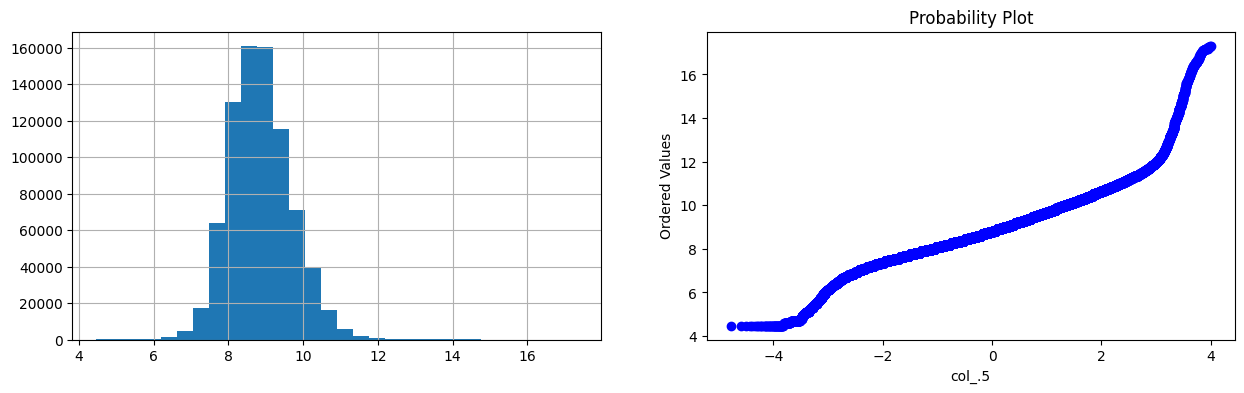

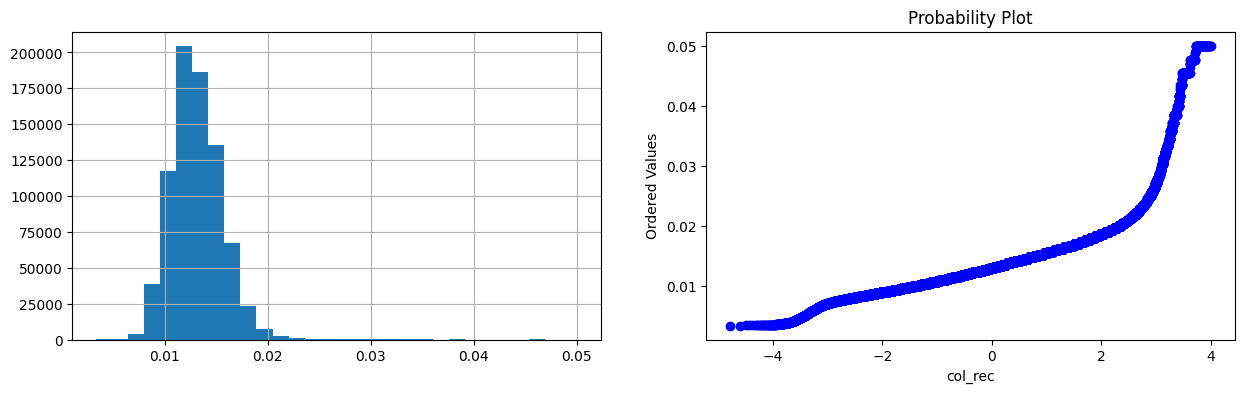

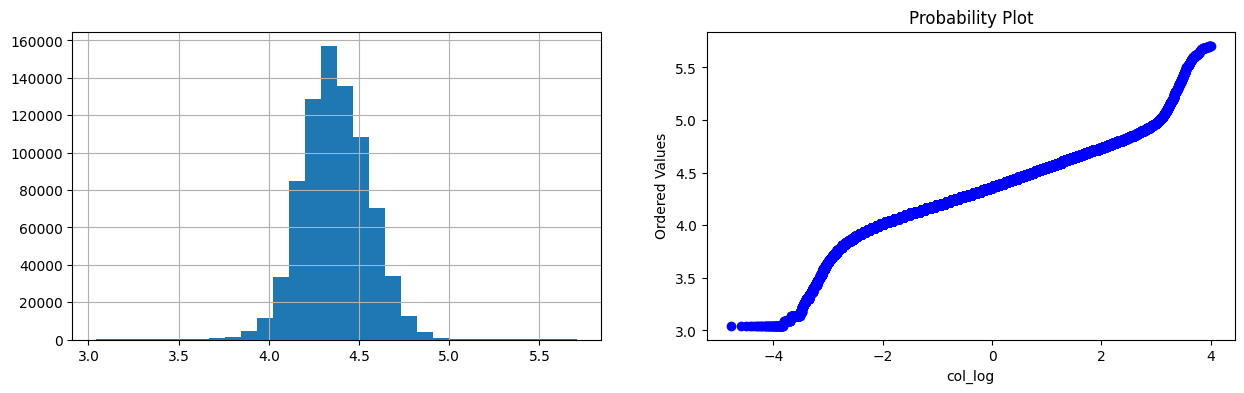

BUN
actual plot


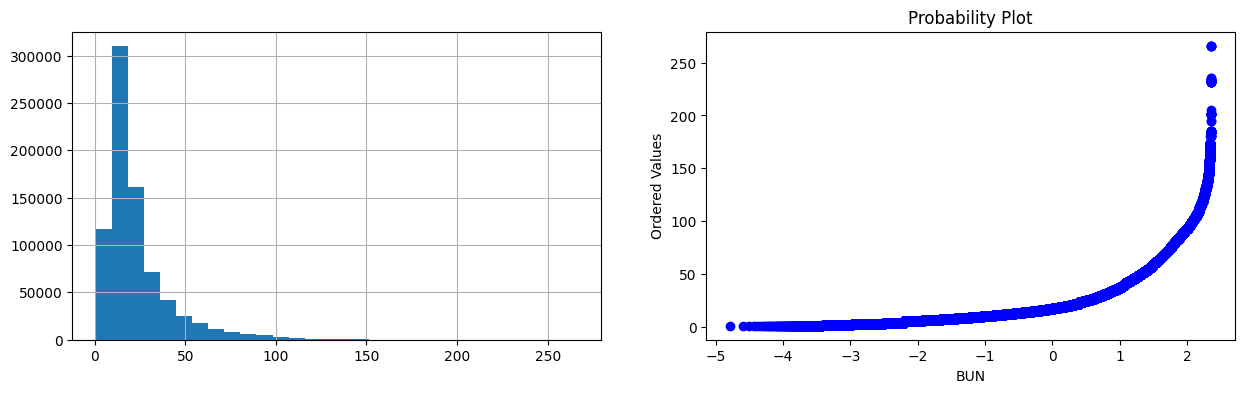

**1/1.5 plot


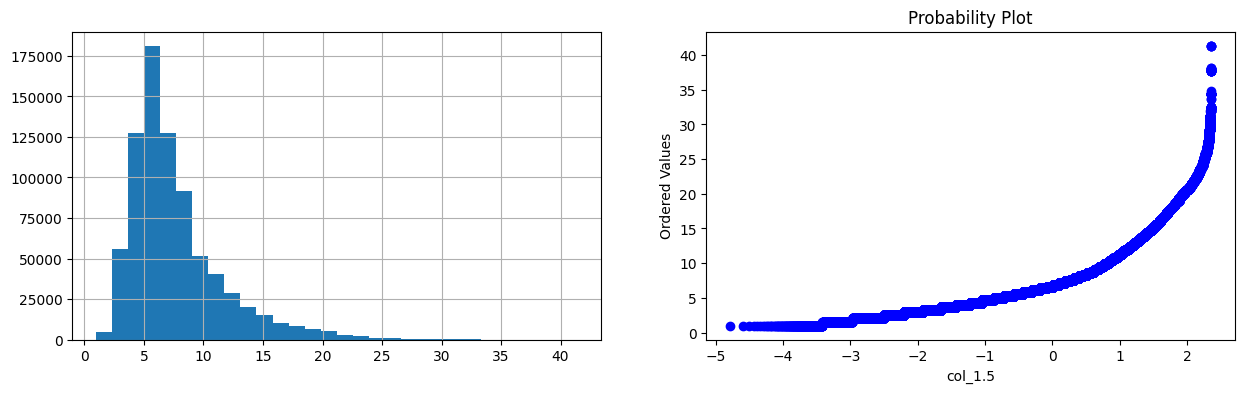

**.5 plot


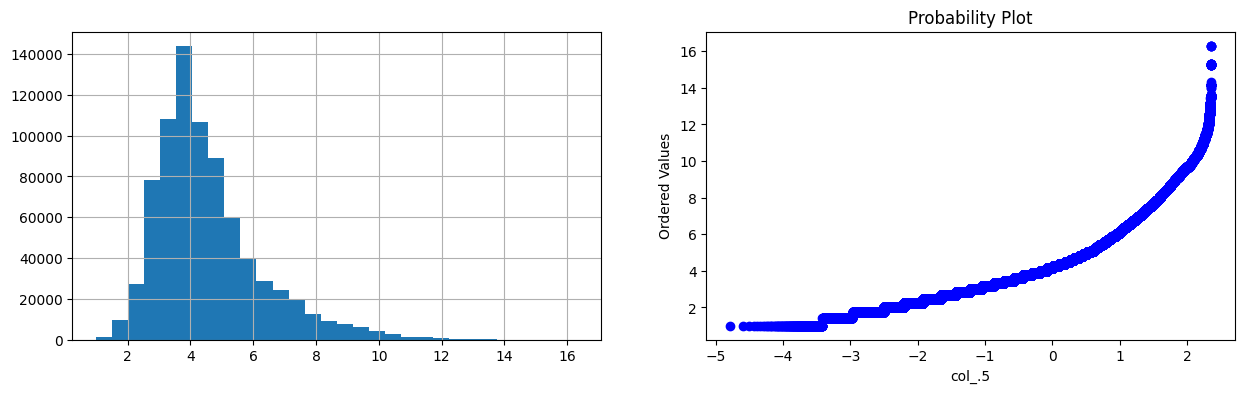

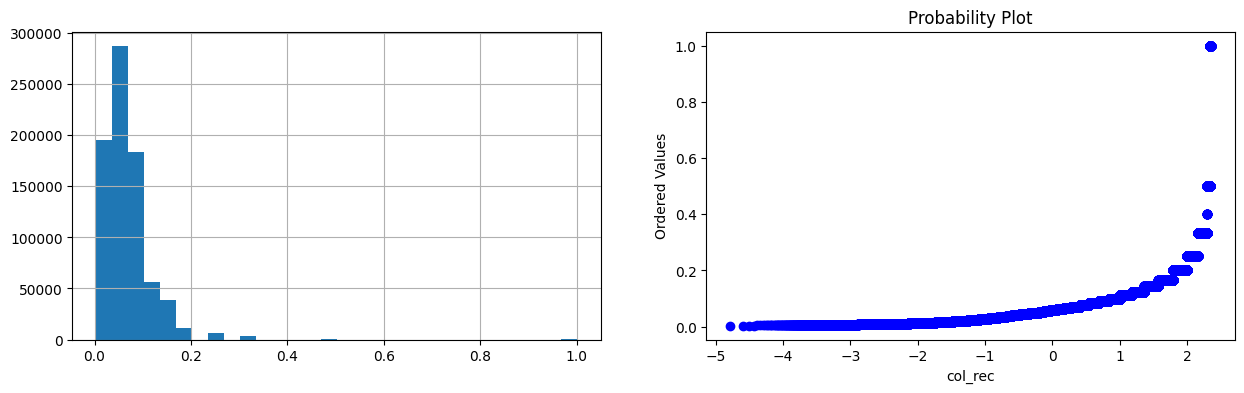

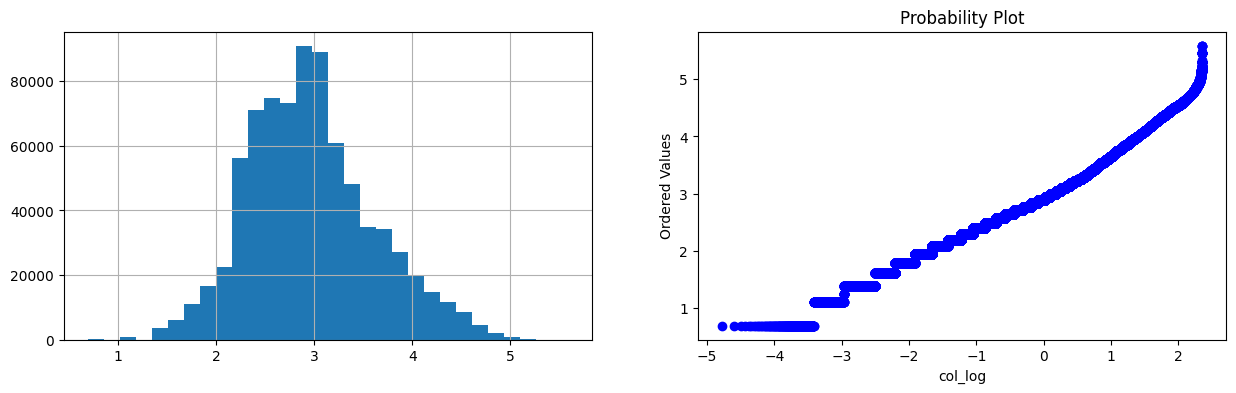

Creatinine
actual plot


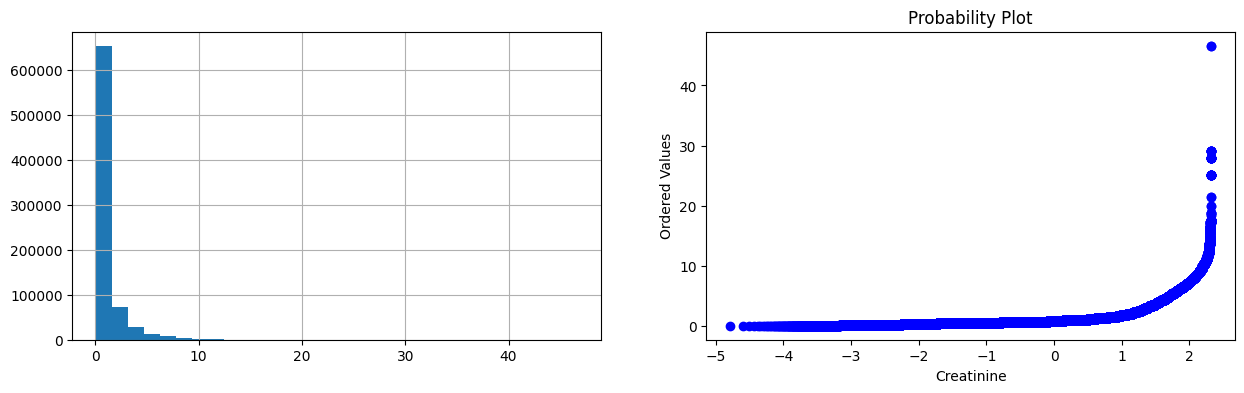

**1/1.5 plot


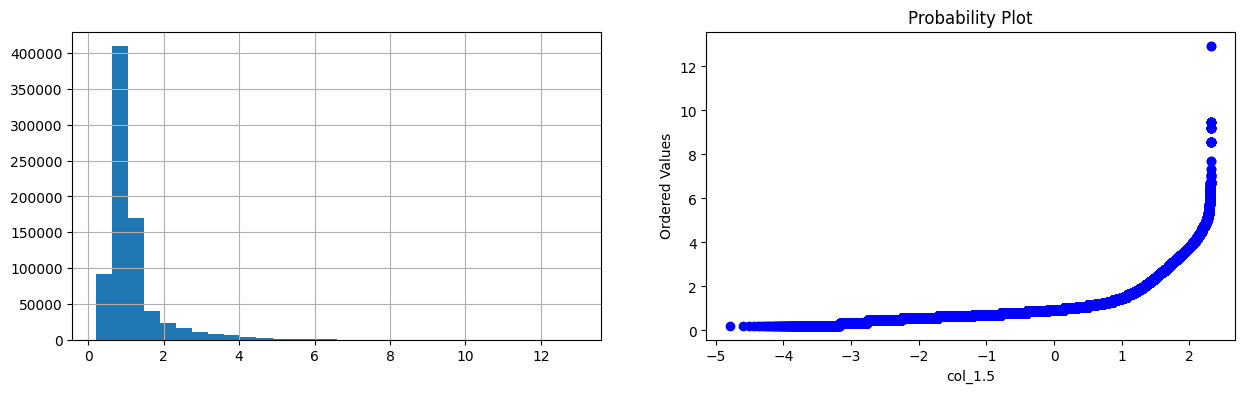

**.5 plot


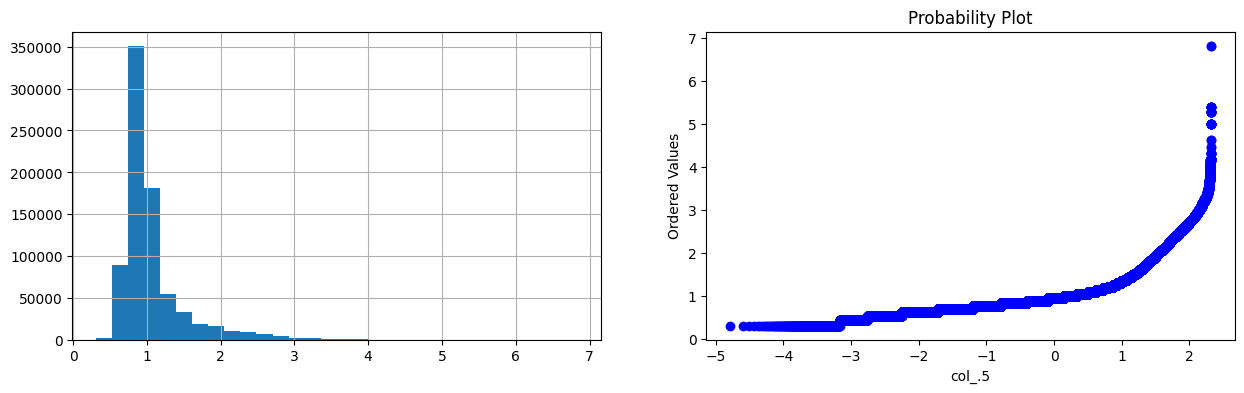

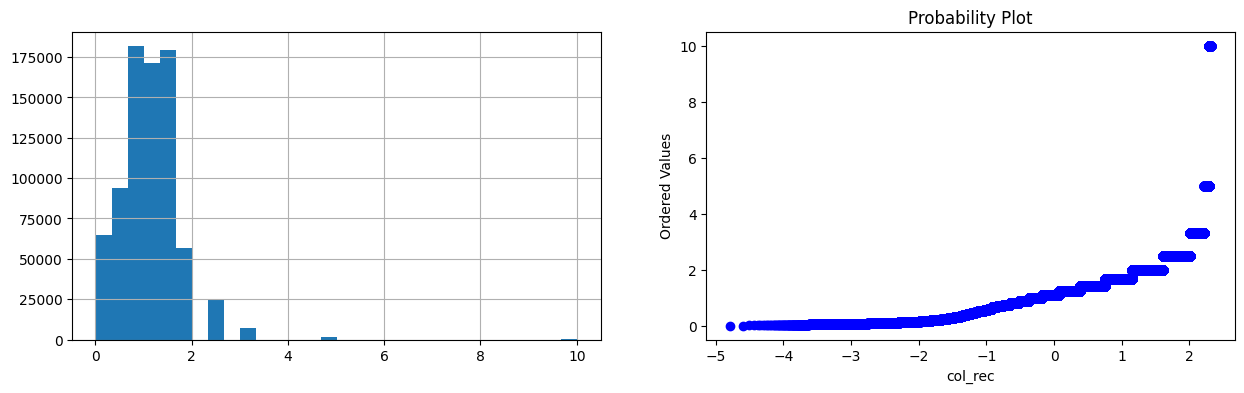

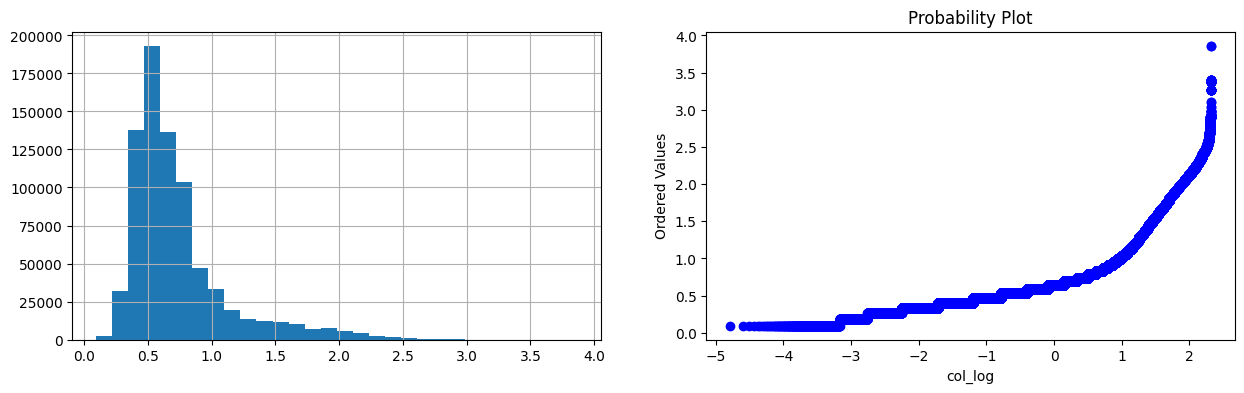

Glucose
actual plot


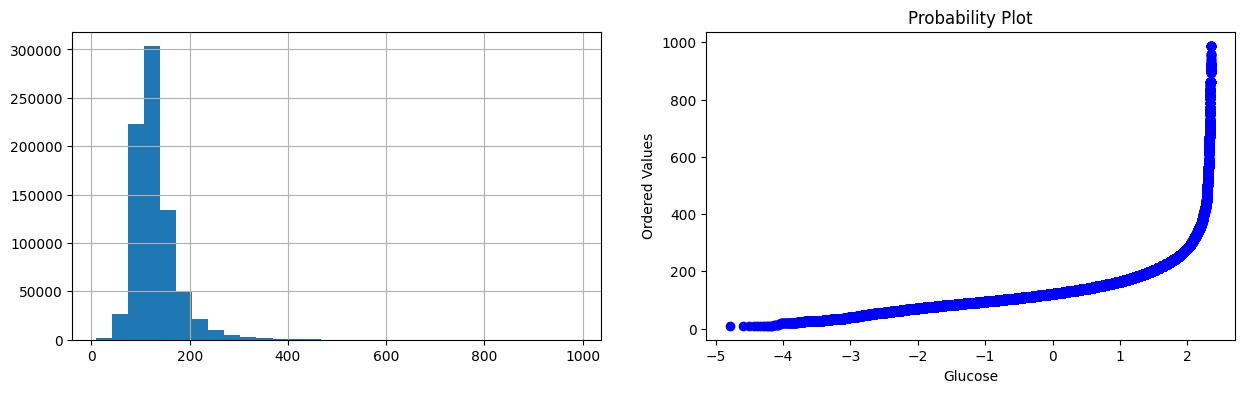

**1/1.5 plot


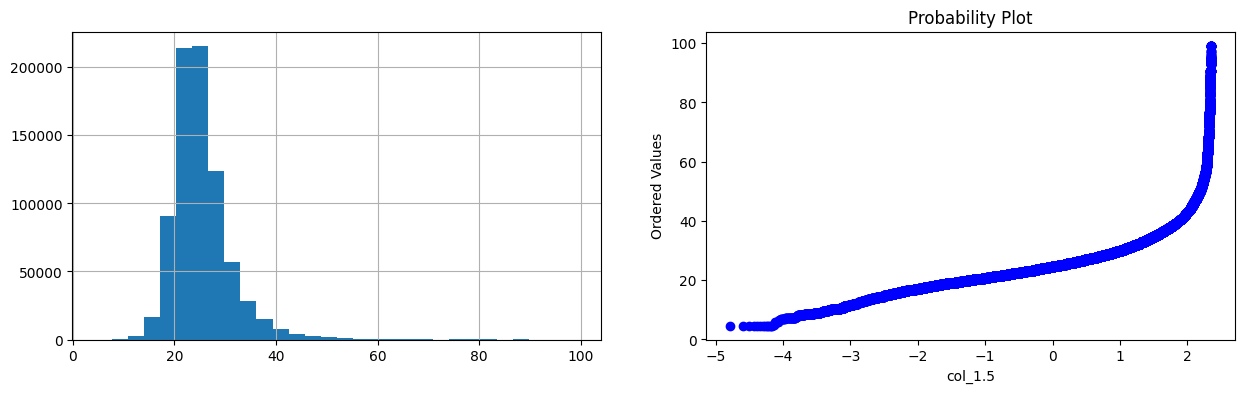

**.5 plot


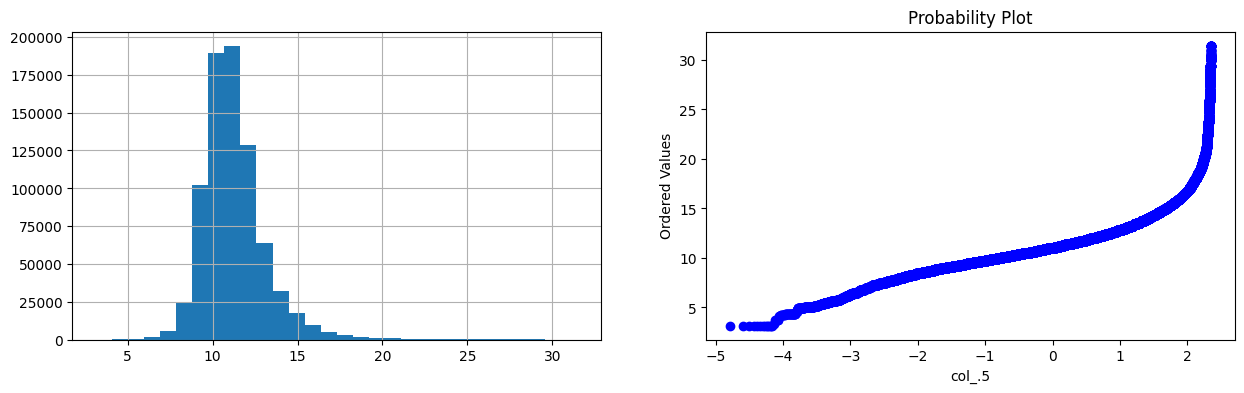

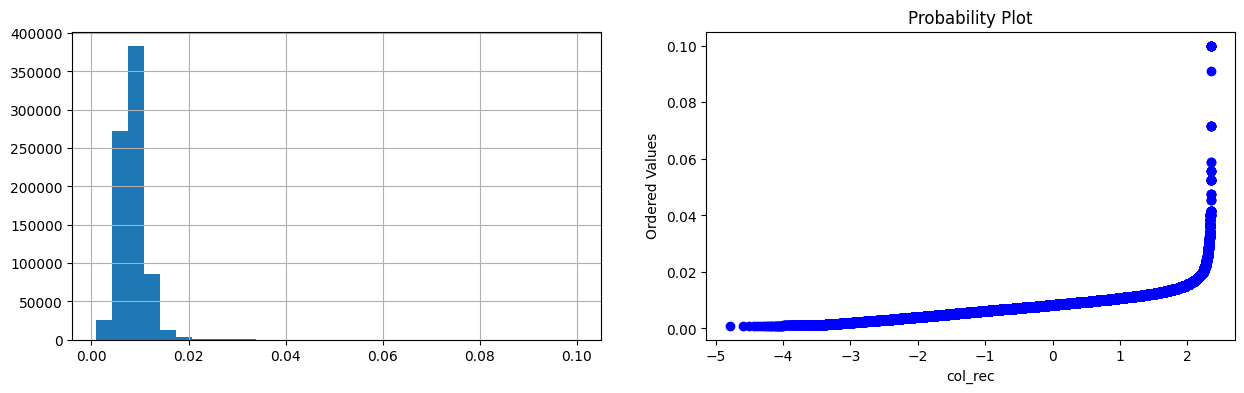

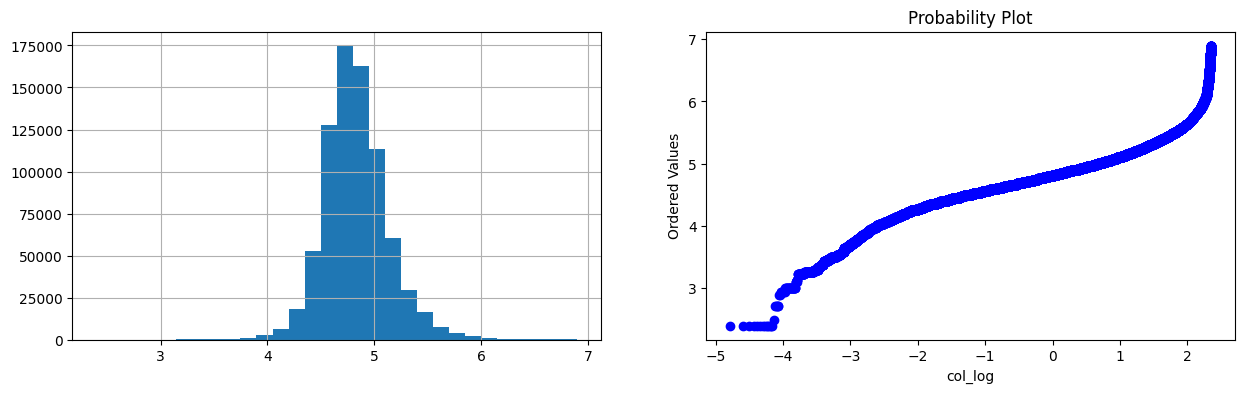

WBC
actual plot


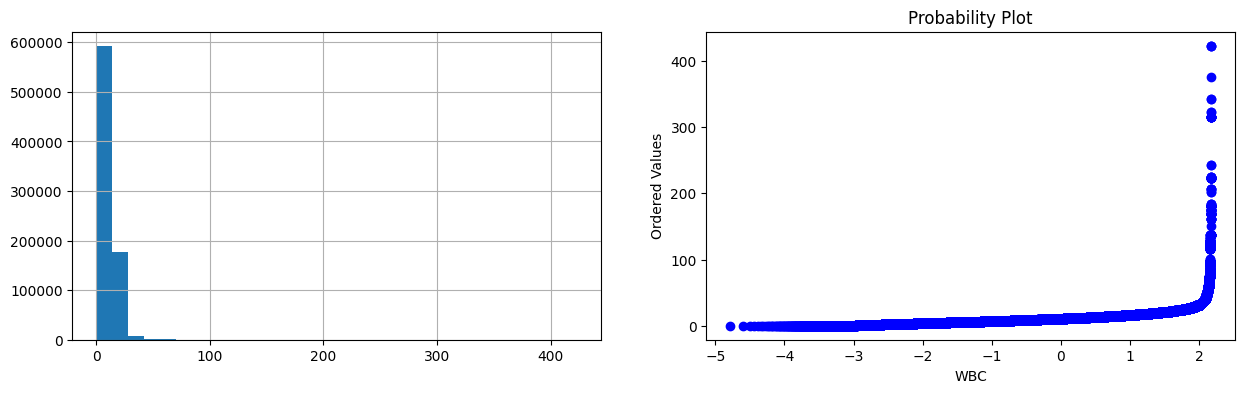

**1/1.5 plot


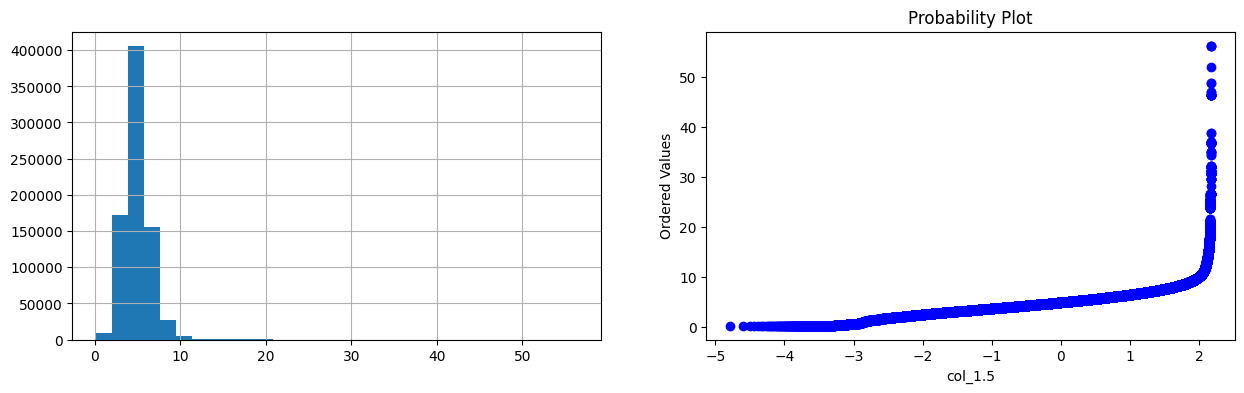

**.5 plot


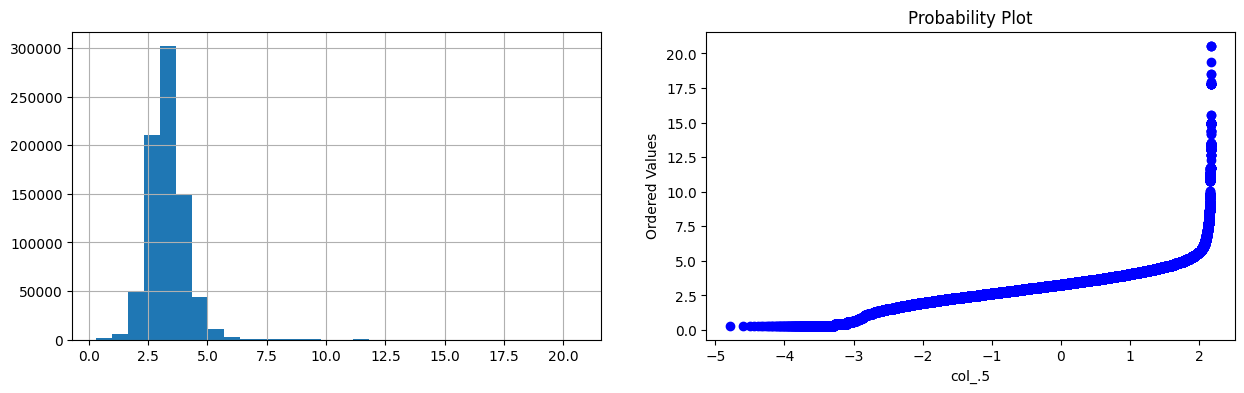

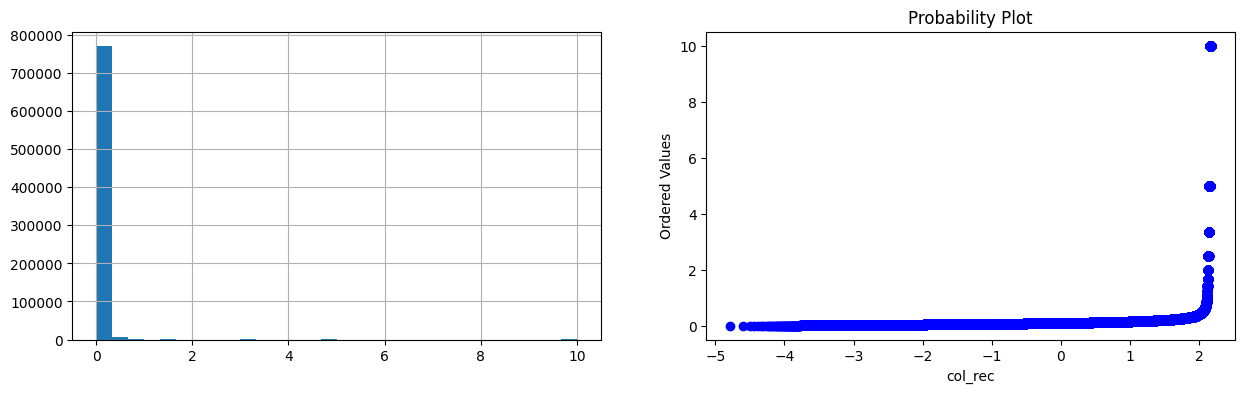

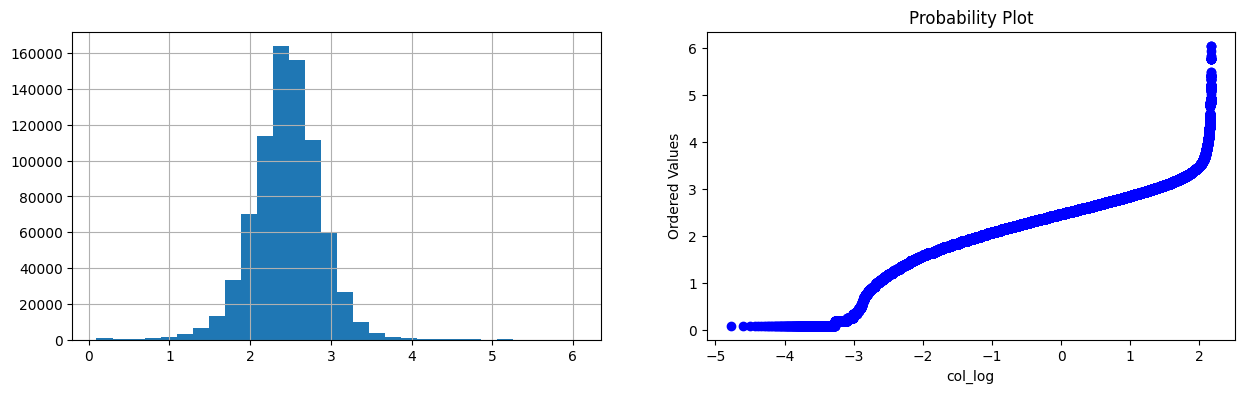

Platelets
actual plot


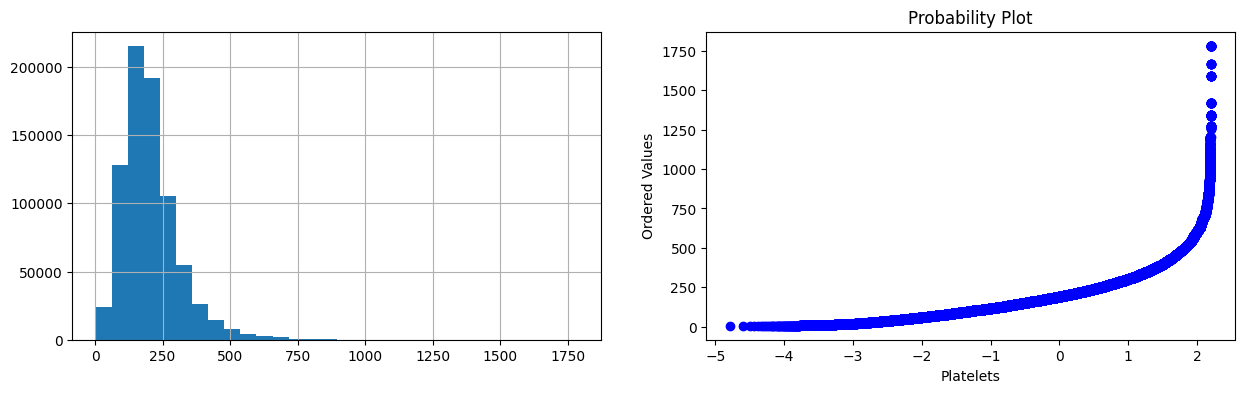

**1/1.5 plot


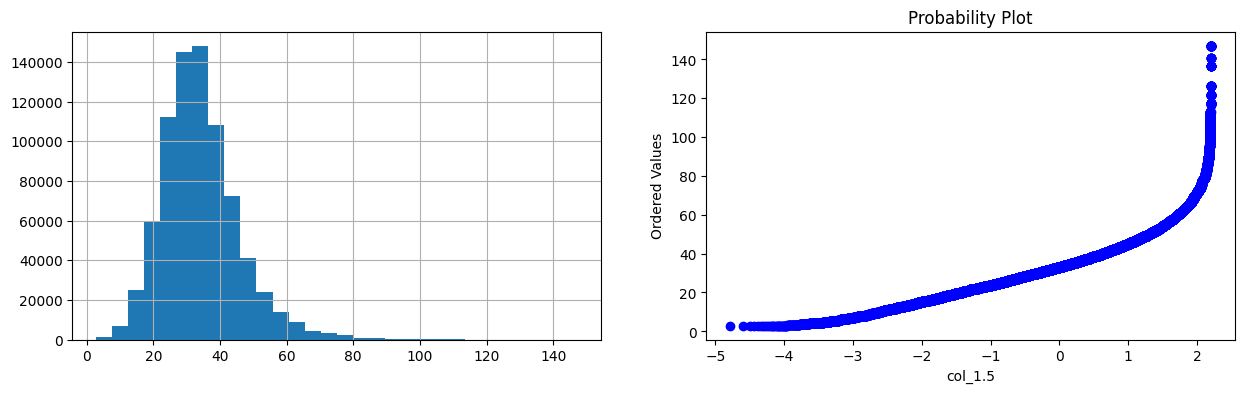

**.5 plot


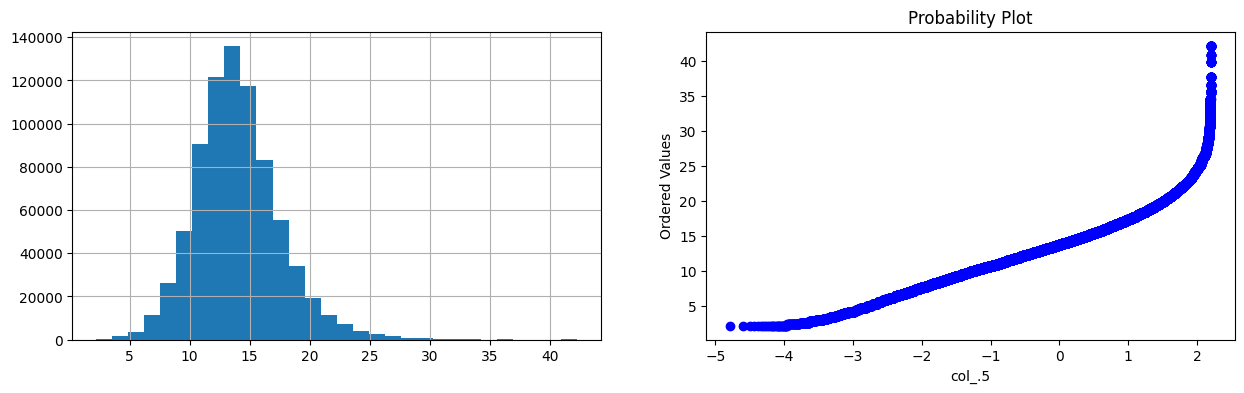

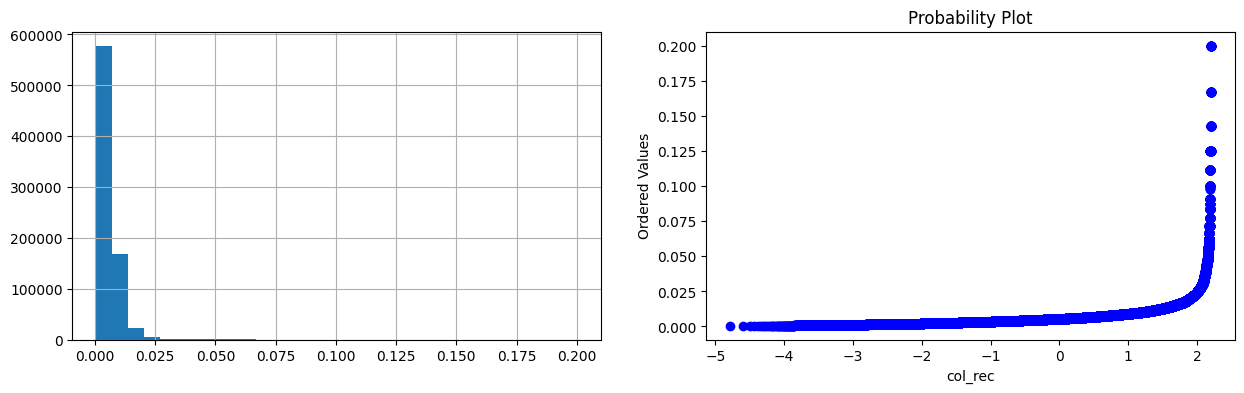

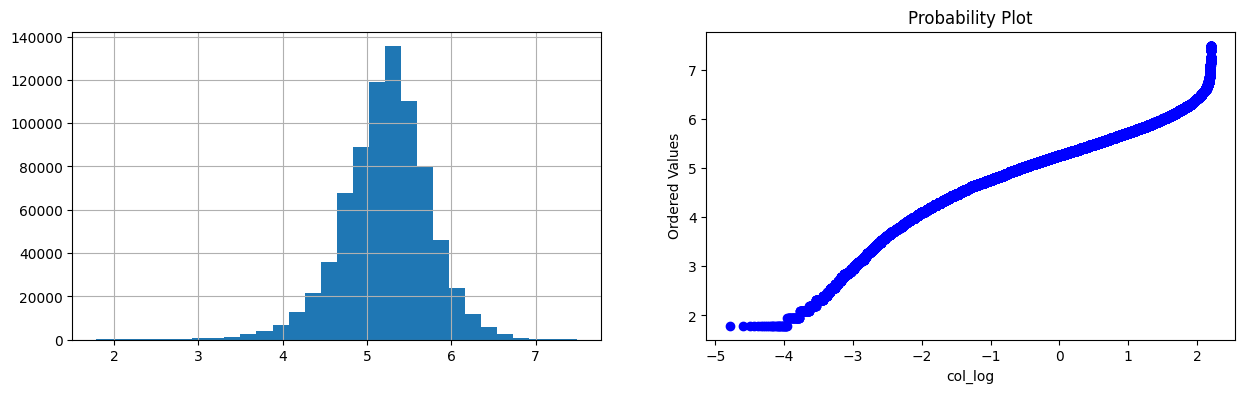

In [27]:
# try normal distribution
# Now we try to check the distribution of values present in different columns after application of various transformations

lst = ['O2Sat', 'Temp', 'MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets' ]
for i in lst:
  print(i)
  try_gaussian(df_train_impute, i)

In [29]:
# after application of the above code, some redundant columns got added to the dataframe, which are removed through this line of code

df_train_impute = df_train_impute.drop(columns = ['col_1.5','col_.5','col_rec','col_log'])

In [30]:
df_train_impute.head()

Hour     HR  O2Sat   Temp    MAP  Resp   BUN  Chloride  \
Patient_ID                                                                  
1          132940     0   97.0   95.0  36.11  75.33  19.0  14.0      85.0   
           132941     1   97.0   95.0  36.11  75.33  19.0  14.0      85.0   
           132942     2   89.0   99.0  36.11  86.00  22.0  14.0      85.0   
           132943     3   90.0   95.0  36.11  91.33  30.0  14.0      85.0   
           132944     4  103.0   88.5  36.11  91.33  24.5  14.0      85.0   

                   Creatinine  Glucose   Hct   Hgb  WBC  Platelets    Age  \
Patient_ID                                                                  
1          132940         0.7    193.0  37.2  12.5  5.7      317.0  83.14   
           132941         0.7    193.0  37.2  12.5  5.7      317.0  83.14   
           132942         0.7    193.0  37.2  12.5  5.7      317.0  83.14   
           132943         0.7    193.0  37.2  12.5  5.7      317.0  83.14   
           132944         0.7    193.0  37.2  12.5  5.7      317.0  83.14   

                   HospAdmTime  ICULOS  SepsisLabel     0      1  
Patient_ID                                                        
1          132940        -0.03       1            0  True  False  
           132941        -0.03       2            0  True  False  
           132942        -0.03       3            0  True  False  
           132943        -0.03       4            0  True  False  
           132944        -0.03       5            0  True  False

In [31]:
# by oserving different plots, it can be concluded that only log was somewhat effective and that too for MAP, BUN, Creatinine, Glucose, WBC & Plateletes
# therefore applying log transformations on the above columns

columns_normalized = ['MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets' ]
for i in columns_normalized:
  df_train_impute[i] = np.log(df_train_impute[i]+1)

In [32]:
df_train_impute.head()

Hour     HR  O2Sat   Temp       MAP  Resp      BUN  \
Patient_ID                                                              
1          132940     0   97.0   95.0  36.11  4.335066  19.0  2.70805   
           132941     1   97.0   95.0  36.11  4.335066  19.0  2.70805   
           132942     2   89.0   99.0  36.11  4.465908  22.0  2.70805   
           132943     3   90.0   95.0  36.11  4.525369  30.0  2.70805   
           132944     4  103.0   88.5  36.11  4.525369  24.5  2.70805   

                   Chloride  Creatinine   Glucose   Hct   Hgb       WBC  \
Patient_ID                                                                
1          132940      85.0    0.530628  5.267858  37.2  12.5  1.902108   
           132941      85.0    0.530628  5.267858  37.2  12.5  1.902108   
           132942      85.0    0.530628  5.267858  37.2  12.5  1.902108   
           132943      85.0    0.530628  5.267858  37.2  12.5  1.902108   
           132944      85.0    0.530628  5.267858  37.2  12.5  1.902108   

                   Platelets    Age  HospAdmTime  ICULOS  SepsisLabel     0  \
Patient_ID                                                                    
1          132940   5.762051  83.14        -0.03       1            0  True   
           132941   5.762051  83.14        -0.03       2            0  True   
           132942   5.762051  83.14        -0.03       3            0  True   
           132943   5.762051  83.14        -0.03       4            0  True   
           132944   5.762051  83.14        -0.03       5            0  True   

                       1  
Patient_ID                
1          132940  False  
           132941  False  
           132942  False  
           132943  False  
           132944  False

In [33]:
# standard normalization

scaler = StandardScaler()
df_train_impute[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']] = scaler.fit_transform(df_train_impute[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']])
df_train_impute.head()

Hour        HR     O2Sat      Temp       MAP      Resp  \
Patient_ID                                                                  
1          132940     0  0.705950 -0.685827 -1.105823 -0.157228  0.043895   
           132941     1  0.705950 -0.685827 -1.105823 -0.157228  0.043895   
           132942     2  0.236955  0.555029 -1.105823  0.547988  0.600192   
           132943     3  0.295579 -0.685827 -1.105823  0.868472  2.083649   
           132944     4  1.057696 -2.702217 -1.105823  0.868472  1.063772   

                        BUN  Chloride  Creatinine   Glucose       Hct  \
Patient_ID                                                              
1          132940 -0.413042 -3.697098   -0.560343  1.444179  1.231844   
           132941 -0.413042 -3.697098   -0.560343  1.444179  1.231844   
           132942 -0.413042 -3.697098   -0.560343  1.444179  1.231844   
           132943 -0.413042 -3.697098   -0.560343  1.444179  1.231844   
           132944 -0.413042 -3.697098   -0.560343  1.444179  1.231844   

                        Hgb       WBC  Platelets    Age  HospAdmTime  ICULOS  \
Patient_ID                                                                     
1          132940  1.114903 -1.288936   1.062522  83.14        -0.03       1   
           132941  1.114903 -1.288936   1.062522  83.14        -0.03       2   
           132942  1.114903 -1.288936   1.062522  83.14        -0.03       3   
           132943  1.114903 -1.288936   1.062522  83.14        -0.03       4   
           132944  1.114903 -1.288936   1.062522  83.14        -0.03       5   

                   SepsisLabel     0      1  
Patient_ID                                   
1          132940            0  True  False  
           132941            0  True  False  
           132942            0  True  False  
           132943            0  True  False  
           132944            0  True  False

In [34]:
df_train_impute = df_train_impute.dropna()

In [35]:
null_values = df_train_impute.isnull().mean()*100
null_values

,0
Hour,0.0
HR,0.0
O2Sat,0.0
Temp,0.0
MAP,0.0
Resp,0.0
BUN,0.0
Chloride,0.0
Creatinine,0.0
Glucose,0.0


**Model Building**

In [37]:
# this function will transform the dataframe (for final testing) in the compatible
# format for the input of the model
# this will make it easier to get the dataframe ready in a single go for prediction

def get_data_ready(df):
  columns_drop={'Unnamed: 0','SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium',
  'Phosphate','Potassium','PTT','Fibrinogen','Unit1','Unit2'}
  df = df.assign(Unit=df['Unit1'] + df['Unit2'])
  # dropping columns based on redundancy
  df = df.drop(columns=columns_drop)
  grouped_by_patient = df.groupby('Patient_ID')
  # imputing backfill and forward fill
  df = grouped_by_patient.apply(lambda x: x.bfill().ffill())
  # dropping all the columns with null values more than 25% and patient_id
  null_col = ['TroponinI', 'Bilirubin_direct', 'AST', 'Bilirubin_total', 'Lactate', 'SaO2', 'FiO2','Unit', 'Patient_ID']
  df = df.drop(columns=null_col)
  # gaussian transformation
  columns_normalized = ['MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets' ]
  for i in columns_normalized:
    df[i] = np.log(df[i]+1)
  # normailizing
  scaler = StandardScaler()
  df[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']] = scaler.fit_transform(df[['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
       'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']])
  # onehot encoding the gender
  one_hot = pd.get_dummies(df['Gender'])
  df = df.join(one_hot)
  df = df.drop('Gender', axis=1)
  df = df.dropna()
  return df

In [38]:
# this fucntion calculates different evaluation parameters of a model

def evaluate_model(y_true,y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  print("Accuracy:", accuracy)
  precision = precision_score(y_true, y_pred)
  print("Precision:", precision)
  recall = recall_score(y_true, y_pred)
  print("Recall:", recall)
  f1 = f1_score(y_true, y_pred)
  print("F1 Score:", f1)
  auc = roc_auc_score(y_true, y_pred)
  print("AUC-ROC:", auc)
  mae = mean_absolute_error(y_true, y_pred)
  print("Mean Absolute Error:", mae)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  print("Root Mean Squared Error:", rmse)
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.show()

In [39]:
# checking the distribution of data points between the two classes

majority_class = df_train_impute[df_train_impute['SepsisLabel'] == 0]
minority_class = df_train_impute[df_train_impute['SepsisLabel'] == 1]
print('number of sepsis label 1 is {}'.format(len(minority_class)))
print('while number of sepsis label 0 is {}'.format(len(majority_class)))

number of sepsis label 1 is 15284
while number of sepsis label 0 is 750935


**So, this shows a clear imbalance between sepsis label 1 and label 0, to deal with this, we did undersampling.**

In [40]:
# Undersampling

majority_class_subset = majority_class.sample(n=2*len(minority_class))
df_train_impute = pd.concat([majority_class_subset, minority_class])

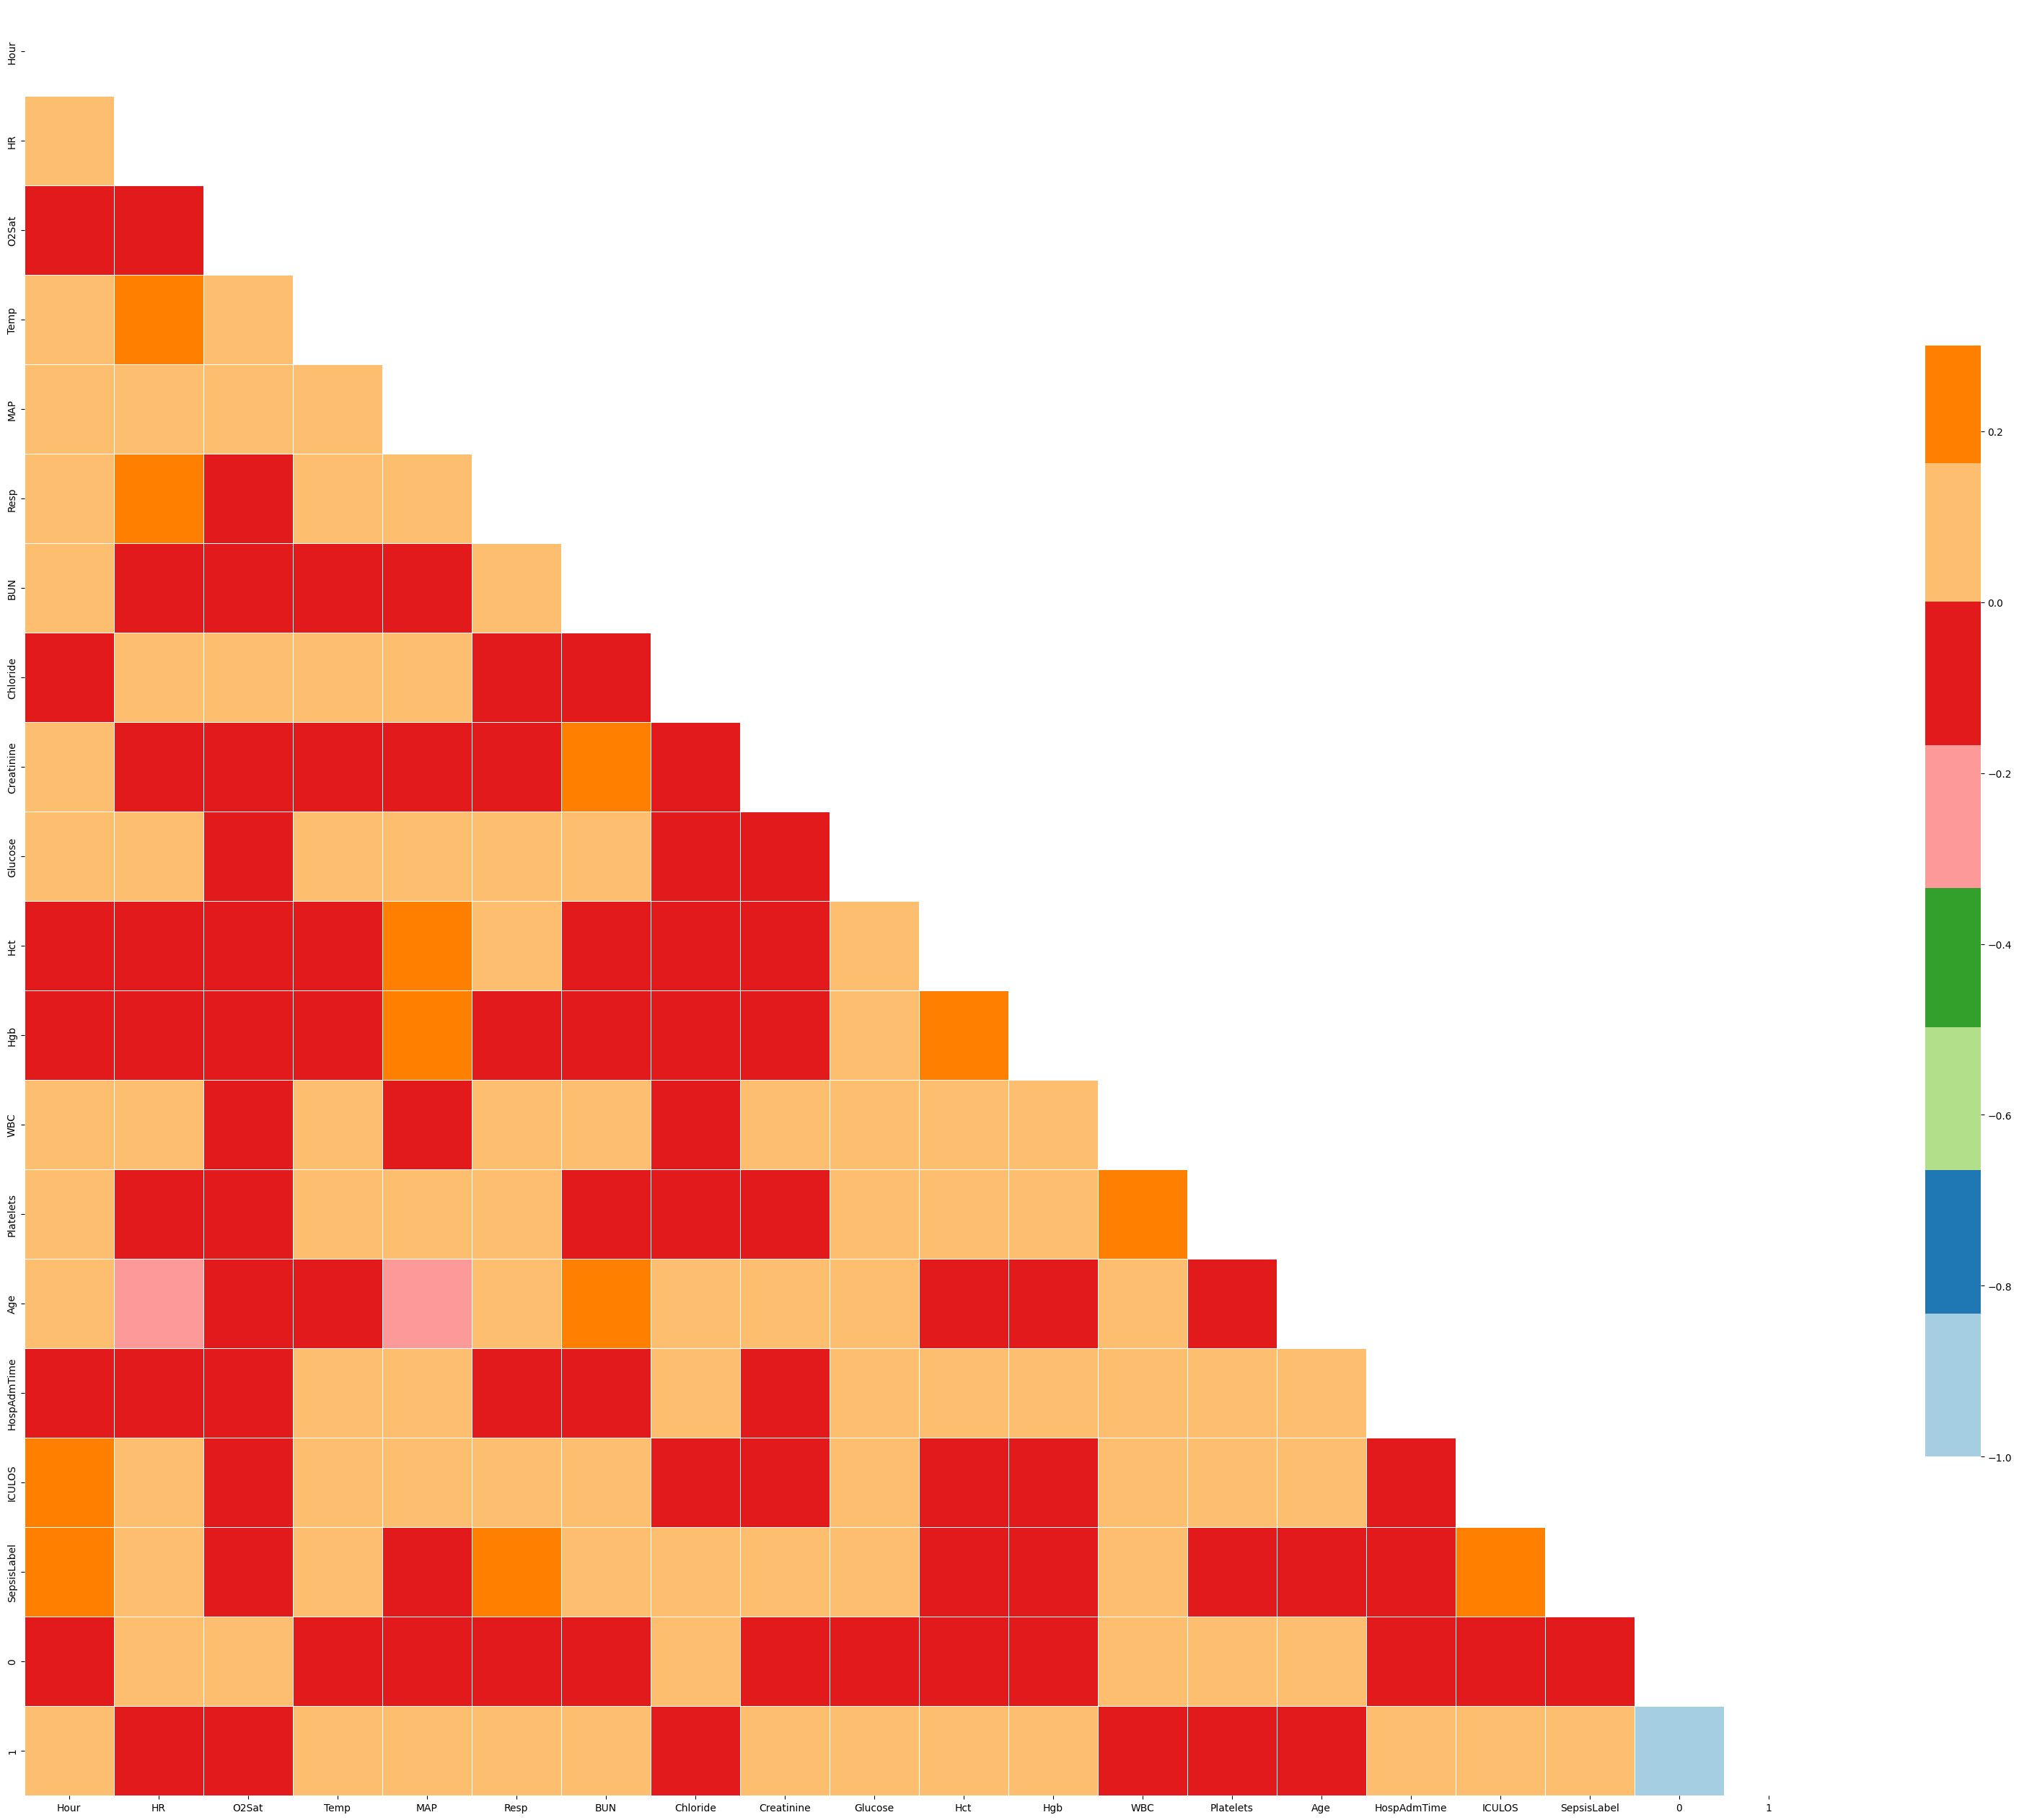

In [41]:
corr_matrix(df_train_impute)

**Randomforest**

In [42]:
# train test split for the imputed output
X = df_train_impute.drop('SepsisLabel', axis=1)
y = df_train_impute['SepsisLabel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
# random forest classifier
# random forest classifier was tested on different hyper parameters and it gave the best results with number of estimators as 300

# model = RandomForestClassifier(n_estimators=100, random_state=0)
# model = RandomForestClassifier(n_estimators=200, random_state=0)
model = RandomForestClassifier(n_estimators=300, random_state=0)
model.fit(X_train, y_train)
rcf_predictions = model.predict(X_test)

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 36681 entries, (np.int64(8476), np.int64(440219)) to (np.int64(4427), np.int64(2440))
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Hour         36681 non-null  int64  
 1   HR           36681 non-null  float64
 2   O2Sat        36681 non-null  float64
 3   Temp         36681 non-null  float64
 4   MAP          36681 non-null  float64
 5   Resp         36681 non-null  float64
 6   BUN          36681 non-null  float64
 7   Chloride     36681 non-null  float64
 8   Creatinine   36681 non-null  float64
 9   Glucose      36681 non-null  float64
 10  Hct          36681 non-null  float64
 11  Hgb          36681 non-null  float64
 12  WBC          36681 non-null  float64
 13  Platelets    36681 non-null  float64
 14  Age          36681 non-null  float64
 15  HospAdmTime  36681 non-null  float64
 16  ICULOS       36681 non-null  int64  
 17  0            36681 non-null 

In [45]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 36681 entries, (np.int64(8476), np.int64(440219)) to (np.int64(4427), np.int64(2440))
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Hour         36681 non-null  int64  
 1   HR           36681 non-null  float64
 2   O2Sat        36681 non-null  float64
 3   Temp         36681 non-null  float64
 4   MAP          36681 non-null  float64
 5   Resp         36681 non-null  float64
 6   BUN          36681 non-null  float64
 7   Chloride     36681 non-null  float64
 8   Creatinine   36681 non-null  float64
 9   Glucose      36681 non-null  float64
 10  Hct          36681 non-null  float64
 11  Hgb          36681 non-null  float64
 12  WBC          36681 non-null  float64
 13  Platelets    36681 non-null  float64
 14  Age          36681 non-null  float64
 15  HospAdmTime  36681 non-null  float64
 16  ICULOS       36681 non-null  int64  
 17  0            36681 non-null 

Accuracy: 0.9560571366263221
Precision: 0.9177995573822321
Recall: 0.9530531845042679
F1 Score: 0.9350942180705427
AUC-ROC: 0.9553021024562157
Mean Absolute Error: 0.0439428633736779
Root Mean Squared Error: 0.20962553130207662


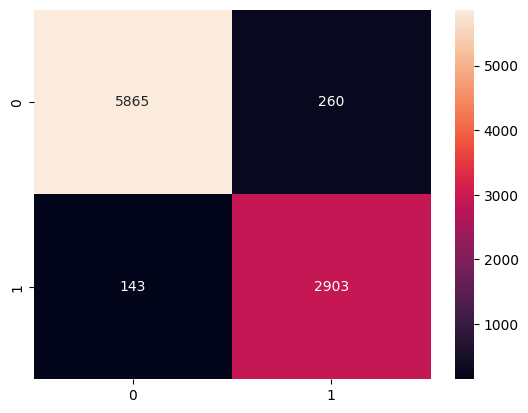

In [48]:
evaluate_model(y_test,rcf_predictions)

Accuracy: 0.7455021262675826
Precision: 0.697339246119734
Recall: 0.4130006565988181
F1 Score: 0.5187628865979381
AUC-ROC: 0.6619288997279805
Mean Absolute Error: 0.2544978737324174
Root Mean Squared Error: 0.504477822835075


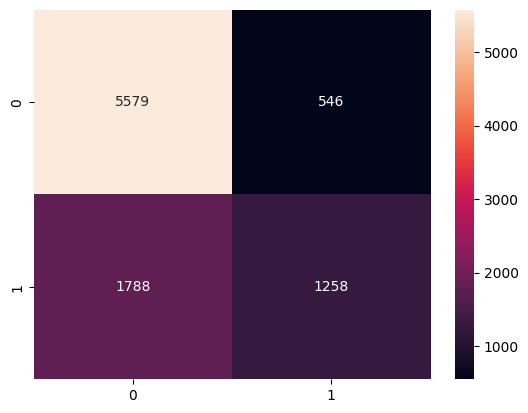

In [49]:
# Naive Bayes Classifier
# NBC performed worse than random forest on each and every aspect of the evaluation metrics

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
nbc_predictions = model.predict(X_test)
evaluate_model(y_test,nbc_predictions)

Accuracy: 0.8230291135099771
Precision: 0.7829025844930417
Recall: 0.6464215364412345
F1 Score: 0.7081460169034346
AUC-ROC: 0.7786393396491886
Mean Absolute Error: 0.1769708864900229
Root Mean Squared Error: 0.4206790777897362


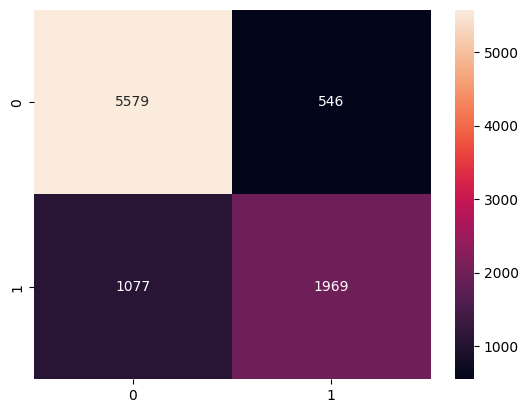

In [50]:
# KNN Classifier
# KNN was tested on different values of k

from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier(n_neighbors=8)
# model = KNeighborsClassifier(n_neighbors=5)
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
knn_predictions = model.predict(X_test)
evaluate_model(y_test,knn_predictions)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7489913858903064
Precision: 0.7440944881889764
Recall: 0.3722915298752462
F1 Score: 0.4962800875273523
AUC-ROC: 0.6543090302437456
Mean Absolute Error: 0.2510086141096936
Root Mean Squared Error: 0.5010075988542425


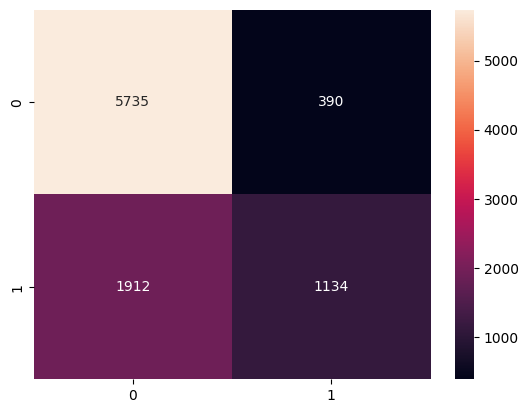

In [51]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
lr_predictions = model.predict(X_test)
evaluate_model(y_test,lr_predictions)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:08:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8602115363646277
Precision: 0.8318284424379232
Recall: 0.7258699934340118
F1 Score: 0.7752454417952315
AUC-ROC: 0.8264452007986386
Mean Absolute Error: 0.13978846363537237
Root Mean Squared Error: 0.3738829544595105


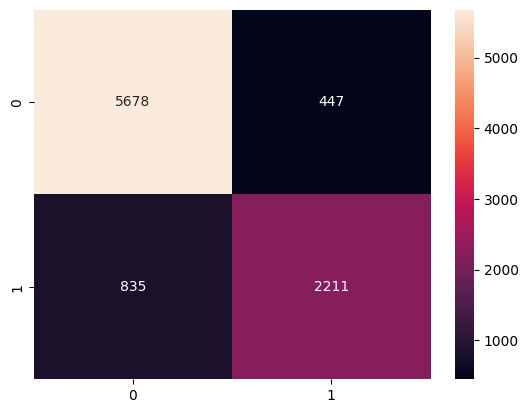

In [52]:
# XGBoost
# XGBoost was run for different combinations of hyperparameters, but overall random forest classifier performed the best in terms of F1 score and other metrics

import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {
    'max_depth': 5,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'binary:logistic'}  # error evaluation for binary classification
num_round = 100
bst = xgb.train(param, dtrain, num_round)
xgb_predictions = bst.predict(dtest)
prediction = []
for i in xgb_predictions:
  if i<0.5:
    prediction.append(0)
  else:
    prediction.append(1)
evaluate_model(y_test,prediction)

**Testing on the data of the other hospital**

<ipython-input-37-a4f1acae8f27>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = grouped_by_patient.apply(lambda x: x.bfill().ffill())


Accuracy: 0.8348607802764207
Precision: 0.08446163765312702
Recall: 0.5349668198060235
F1 Score: 0.1458898865455558
AUC-ROC: 0.6889739832429796
Mean Absolute Error: 0.1651392197235792
Root Mean Squared Error: 0.40637325173241806


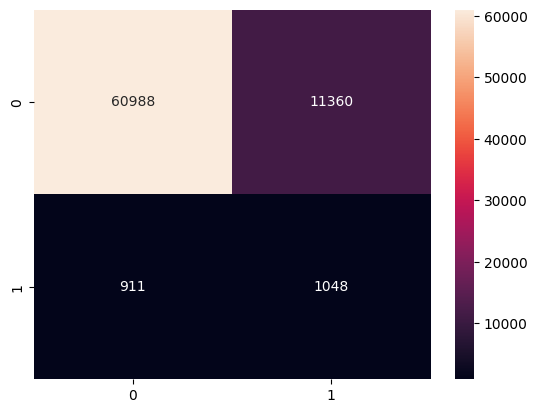

In [61]:
# testing on the other hospital data
df = get_data_ready(df_test)
X = df.drop('SepsisLabel', axis=1)
X.columns = X.columns.astype(str)
y = df['SepsisLabel']

rcf_predictions = model.predict(X)
evaluate_model(y, rcf_predictions)


In [58]:
print(type(df_test))

<class 'pandas.core.indexes.base.Index'>


**In this notebook several models were built to predict the onset of sepsis 6 hours before. After deep analysis several features were dropped and the remaining were imputed. Then the remaining features were applied with gaussian transformation and then normalized, so that a sngle feature won't start dominating the output. After all this exploration and feature engineering, several classifier models were run, in which Random Forest Classifier gave the best results.**